# Importação das bilbiotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from skopt import gp_minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Importação da base de dados

In [2]:
df = pd.read_excel('dados_para_questão_de_ia.xlsx')

df

Ano  Mês  TARGET  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  PARAMETRO 4  \
0   2019    1    1205          378         0.32         1570     22042272   
1   2019    2    1212          511         0.43         1677     21961658   
2   2019    3    1309          516         0.75         1708     22285348   
3   2019    4    1369          722         0.57         2083     22283752   
4   2019    5    1517          636         0.13         2304     22602871   
5   2019    6    1357          742         0.01         1658     22720686   
6   2019    7    1568          653         0.19         2005     22784125   
7   2019    8    1469          737         0.11         1626     22713228   
8   2019    9    1502          724        -0.04         1600     22752837   
9   2019   10    1539          749         0.10         1629     22752837   
10  2019   11    1479          818         0.51         1619     22752837   
11  2019   12    1348          598         1.15         1472     22752837   
12  2020    1    1372          511         0.21         1238     23741648   
13  2020    2    1148          637         0.25         1277     23741648   
14  2020    3    1067          437         0.07         1160     23741648   
15  2020    4    1080          317        -0.31          953     23741648   
16  2020    5    1249          302        -0.38         1278     23741648   
17  2020    6    1902          846         0.26         2188     23741648   
18  2020    7    2362          913         0.36         2211     23741648   
19  2020    8    2510          790         0.24         1927     23741648   
20  2020    9    2418          956         0.64         1641     23484812   
21  2020   10    2356         1109         0.86         1842     23550361   
22  2020   11    2356          962         0.89         1697     23546667   
23  2020   12    2646         1088         1.35         2045     23741648   
24  2021    1    2362         1115         0.25         1656     24496713   
25  2021    2    2474         1053         0.86         1668     24541752   
26  2021    3    2657         1195         0.93         2213     24959405   
27  2021    4    2592         1112         0.31         1850     25137544   
28  2021    5    2635         1408         0.83         2050     25221106   
29  2021    6    2750         1424         0.53         1838     25322596   
30  2021    7    3032         1234         0.96         2093     25277402   
31  2021    8    3017         1398         0.87         1934     25215537   
32  2021    9    2384          957         1.16         1794     25082335   
33  2021   10    2596         1108         1.25         1580     25082335   
34  2021   11    2787         1175         0.95         1396     25082335   
35  2021   12    2883         1088         0.73         2061     25082335   
36  2022    1    2674          650         0.54         1400     27590269   
37  2022    2    2382          615         1.01         1014     27590269   
38  2022    3    2674          477         1.62         1240     27590269   
39  2022    4    2620          564         1.06         1186     27590269   
40  2022    5    2636          577         0.47         1603     27590269   
41  2022    6    2521          504         0.67         1754     27590269   
42  2022    7    2683          716        -0.68         1780     27590269   
43  2022    8    3086          893        -0.36         2071     27590269   
44  2022    9    2947          598        -0.29         1868     27689984   
45  2022   10    2569          586         0.59         1691     27697463   
46  2022   11    2486          501         0.41         1573     27630025   
47  2022   12    3262          564         0.62         1927     27590269   
48  2023    1    2769          407         0.53         1637     28711189   
49  2023    2    2445          316         0.84         1622     28709442   
50  2023    3    2825          563         0.71         2094     28511402   
5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          60 non-null     int64  
 1   Mês          60 non-null     int64  
 2   TARGET       60 non-null     int64  
 3   PARAMETRO 1  60 non-null     int64  
 4   PARAMETRO 2  60 non-null     float64
 5   PARAMETRO 3  60 non-null     int64  
 6   PARAMETRO 4  60 non-null     int64  
 7   PARAMETRO 5  60 non-null     int64  
 8   PARAMETRO 6  60 non-null     int64  
 9   PARAMETRO 7  60 non-null     int64  
 10  PARAMETRO 8  60 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 5.3 KB


In [4]:
df.describe().T

count          mean           std          min           25%  \
Ano           60.0  2.021000e+03  1.426148e+00      2019.00  2.020000e+03   
Mês           60.0  6.500000e+00  3.481184e+00         1.00  3.750000e+00   
TARGET        60.0  2.264700e+03  6.321318e+02      1067.00  1.533500e+03   
PARAMETRO 1   60.0  7.472333e+02  2.870366e+02       302.00  5.552500e+02   
PARAMETRO 2   60.0  4.748333e-01  4.555551e-01        -0.68  2.250000e-01   
PARAMETRO 3   60.0  1.816350e+03  4.219215e+02       953.00  1.602250e+03   
PARAMETRO 4   60.0  2.551594e+07  2.352910e+06  21961658.00  2.369383e+07   
PARAMETRO 5   60.0  5.090459e+07  3.709269e+06  45345128.00  4.815904e+07   
PARAMETRO 6   60.0  1.237087e+06  2.014386e+05    946826.00  1.112838e+06   
PARAMETRO 7   60.0  6.743667e+02  1.833669e+02       405.00  5.020000e+02   
PARAMETRO 8   60.0  1.201113e+04  2.390837e+03      5138.00  1.044475e+04   

                     50%           75%          max  
Ano              2021.00  2.022000e+03      2023.00  
Mês                 6.50  9.250000e+00        12.00  
TARGET           2498.00  2.663500e+03      3262.00  
PARAMETRO 1       643.50  9.562500e+02      1424.00  
PARAMETRO 2         0.49  8.325000e-01         1.62  
PARAMETRO 3      1739.00  2.074000e+03      2942.00  
PARAMETRO 4  25082335.00  2.760021e+07  29099511.00  
PARAMETRO 5  50264701.50  5.314977e+07  57485050.00  
PARAMETRO 6   1140139.00  1.340126e+06   1717925.00  
PARAMETRO 7       674.50  8.337500e+02      1064.00  
PARAMETRO 8     11942.00  1.359900e+04     16829.00

## Tratamento da coluna de data

In [5]:
df['Data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mês'].astype(str) + '-01') + pd.offsets.MonthEnd(0)

df

Ano  Mês  TARGET  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  PARAMETRO 4  \
0   2019    1    1205          378         0.32         1570     22042272   
1   2019    2    1212          511         0.43         1677     21961658   
2   2019    3    1309          516         0.75         1708     22285348   
3   2019    4    1369          722         0.57         2083     22283752   
4   2019    5    1517          636         0.13         2304     22602871   
5   2019    6    1357          742         0.01         1658     22720686   
6   2019    7    1568          653         0.19         2005     22784125   
7   2019    8    1469          737         0.11         1626     22713228   
8   2019    9    1502          724        -0.04         1600     22752837   
9   2019   10    1539          749         0.10         1629     22752837   
10  2019   11    1479          818         0.51         1619     22752837   
11  2019   12    1348          598         1.15         1472     22752837   
12  2020    1    1372          511         0.21         1238     23741648   
13  2020    2    1148          637         0.25         1277     23741648   
14  2020    3    1067          437         0.07         1160     23741648   
15  2020    4    1080          317        -0.31          953     23741648   
16  2020    5    1249          302        -0.38         1278     23741648   
17  2020    6    1902          846         0.26         2188     23741648   
18  2020    7    2362          913         0.36         2211     23741648   
19  2020    8    2510          790         0.24         1927     23741648   
20  2020    9    2418          956         0.64         1641     23484812   
21  2020   10    2356         1109         0.86         1842     23550361   
22  2020   11    2356          962         0.89         1697     23546667   
23  2020   12    2646         1088         1.35         2045     23741648   
24  2021    1    2362         1115         0.25         1656     24496713   
25  2021    2    2474         1053         0.86         1668     24541752   
26  2021    3    2657         1195         0.93         2213     24959405   
27  2021    4    2592         1112         0.31         1850     25137544   
28  2021    5    2635         1408         0.83         2050     25221106   
29  2021    6    2750         1424         0.53         1838     25322596   
30  2021    7    3032         1234         0.96         2093     25277402   
31  2021    8    3017         1398         0.87         1934     25215537   
32  2021    9    2384          957         1.16         1794     25082335   
33  2021   10    2596         1108         1.25         1580     25082335   
34  2021   11    2787         1175         0.95         1396     25082335   
35  2021   12    2883         1088         0.73         2061     25082335   
36  2022    1    2674          650         0.54         1400     27590269   
37  2022    2    2382          615         1.01         1014     27590269   
38  2022    3    2674          477         1.62         1240     27590269   
39  2022    4    2620          564         1.06         1186     27590269   
40  2022    5    2636          577         0.47         1603     27590269   
41  2022    6    2521          504         0.67         1754     27590269   
42  2022    7    2683          716        -0.68         1780     27590269   
43  2022    8    3086          893        -0.36         2071     27590269   
44  2022    9    2947          598        -0.29         1868     27689984   
45  2022   10    2569          586         0.59         1691     27697463   
46  2022   11    2486          501         0.41         1573     27630025   
47  2022   12    3262          564         0.62         1927     27590269   
48  2023    1    2769          407         0.53         1637     28711189   
49  2023    2    2445          316         0.84         1622     28709442   
50  2023    3    2825          563         0.71         2094     28511402   
5

In [6]:
df = df.set_index('Data')

df

Ano  Mês  TARGET  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   
2023-01-31  2023    1    2769          407         0.53         1637   
2023-02-28  2023    2    2445          316         0.84         1622   
2023-03-31  2023    3    2825          563         0.71         2094   
2023-04-30  2023    4    2319          484         0.61         1724   
2023-05-31  2023    5    2380          618         0.23         2183   
2023-06-30  2023    6    2549          601        -0.

## Tratamento do alvo

In [7]:
df.rename(columns = {'TARGET' : 'VENDAS'}, inplace = True)

In [8]:
mediana = df['VENDAS'].median()

df['TARGET'] = df['VENDAS'].shift(-1).fillna(mediana)

df

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   
2023-01-31  2023    1    2769          407         0.53         1637   
2023-02-28  2023    2    2445          316         0.84         1622   
2023-03-31  2023    3    2825          563         0.71         2094   
2023-04-30  2023    4    2319          484         0.61         1724   
2023-05-31  2023    5    2380          618         0.23         2183   
2023-06-30  2023    6    2549          601        -0.

# Análise exploratória dos dados

## Gráfico de vendas geral

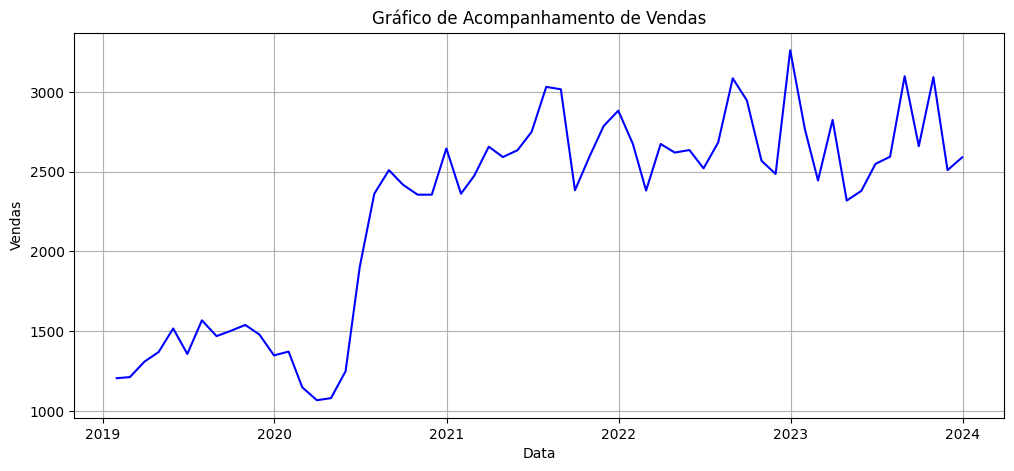

In [9]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = df.index, y = 'VENDAS', color = 'blue')
plt.title('Gráfico de Acompanhamento de Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show();

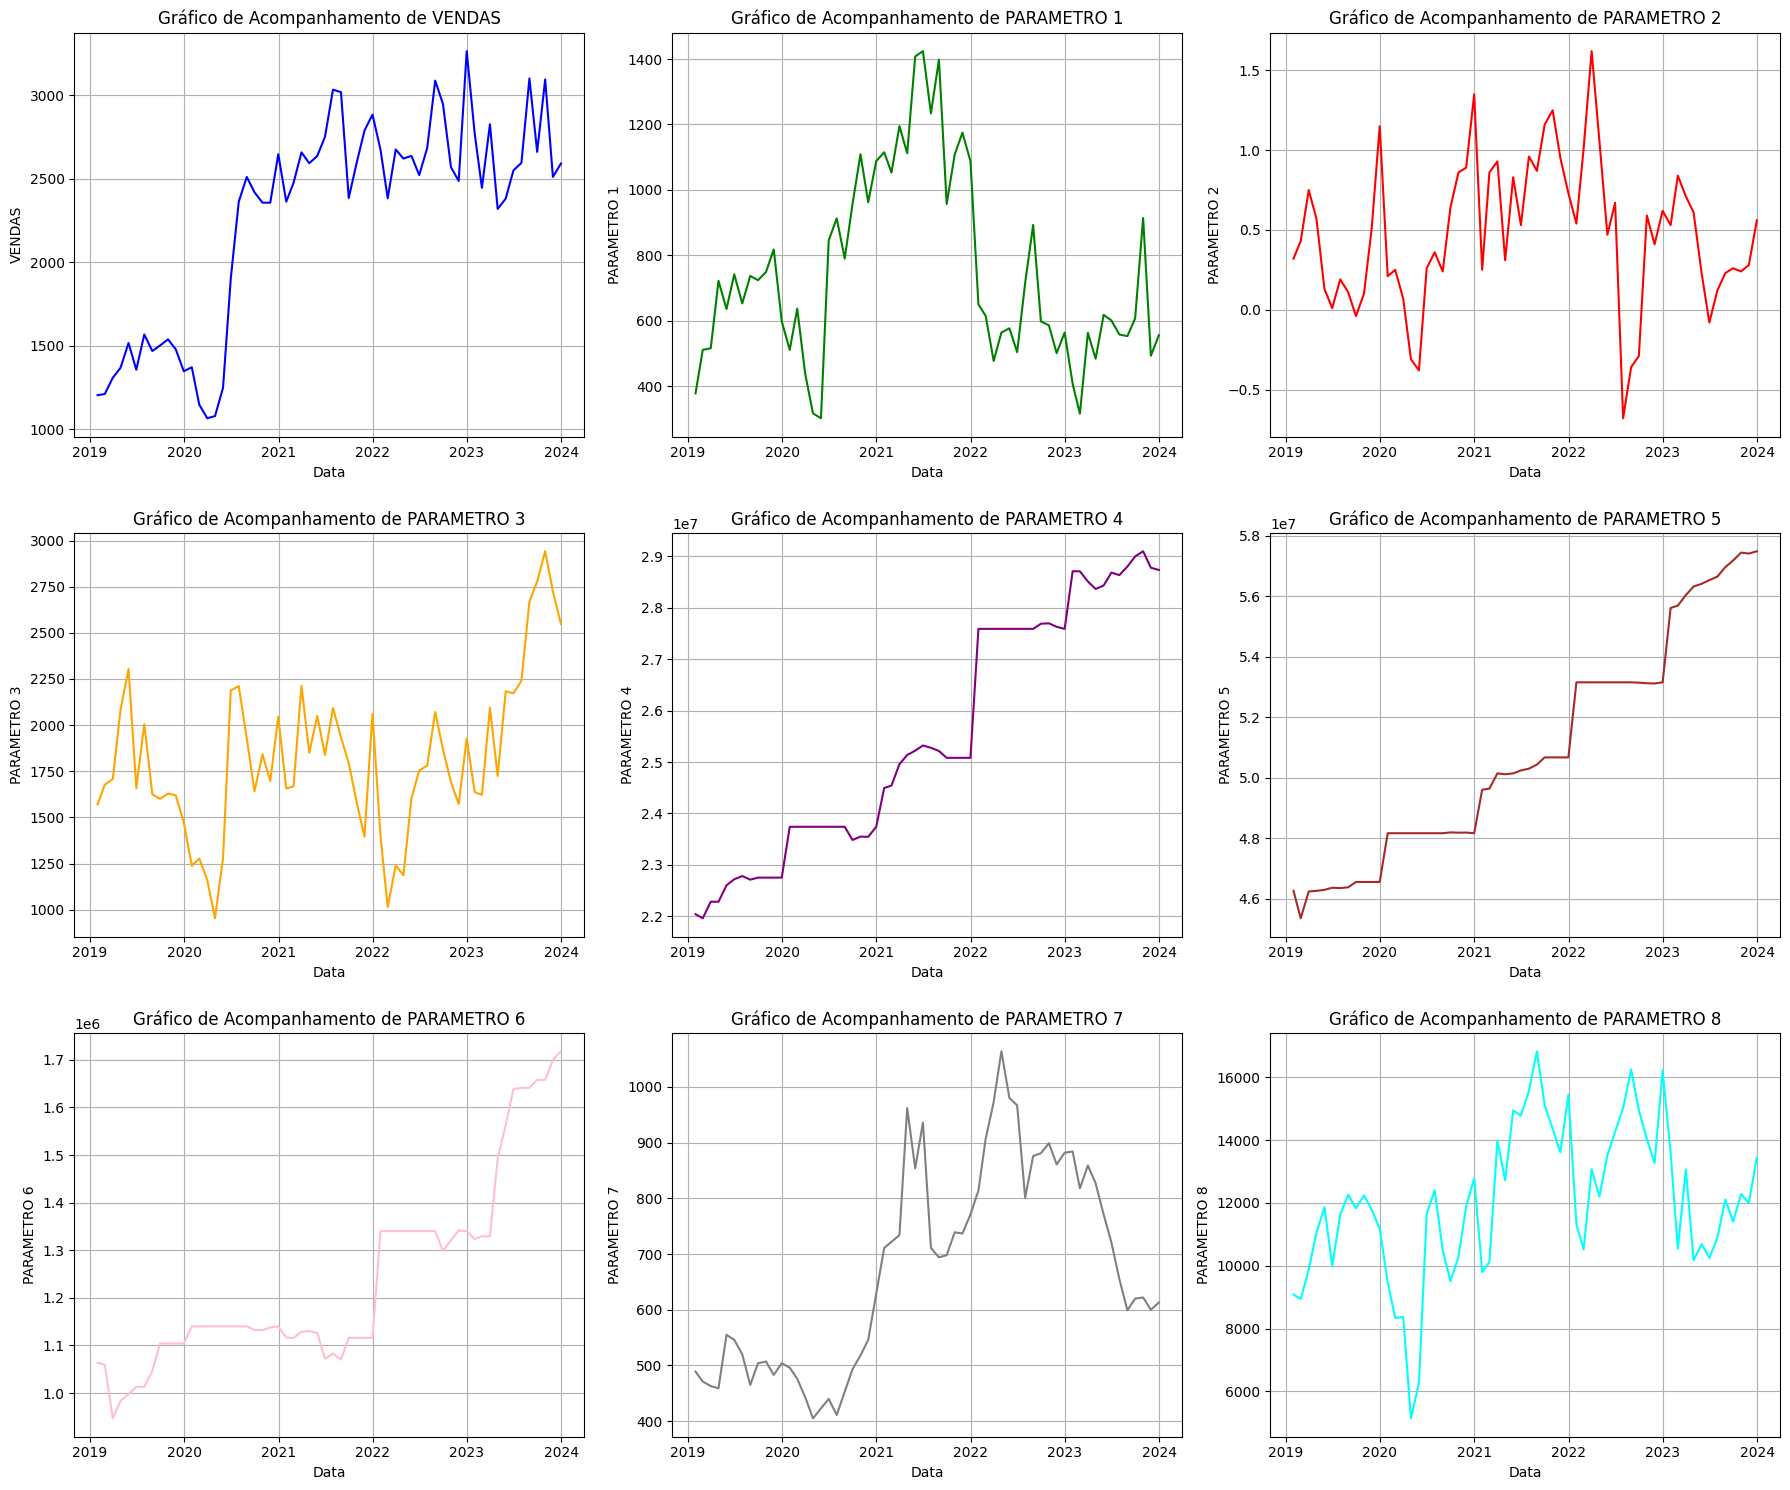

In [10]:
columns_to_plot = ['VENDAS', 
                   'PARAMETRO 1', 
                   'PARAMETRO 2',
                   'PARAMETRO 3',
                   'PARAMETRO 4',
                   'PARAMETRO 5',
                   'PARAMETRO 6',
                   'PARAMETRO 7',
                   'PARAMETRO 8']

cores = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 15))

for i, col in enumerate(columns_to_plot):
    row = i // 3  
    col_pos = i % 3 
    sns.lineplot(data = df, x = df.index, y = col, ax = axes[row, col_pos], color = cores[i])
    axes[row, col_pos].set_title(f'Gráfico de Acompanhamento de {col}')
    axes[row, col_pos].set_xlabel('Data')
    axes[row, col_pos].set_ylabel(col)
    axes[row, col_pos].grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show();

## Vendas por mês x ano

In [11]:
sales_general = df.pivot(index = 'Ano', columns = 'Mês', values = 'VENDAS')

sales_general

Mês     1     2     3     4     5     6     7     8     9     10    11    12
Ano                                                                         
2019  1205  1212  1309  1369  1517  1357  1568  1469  1502  1539  1479  1348
2020  1372  1148  1067  1080  1249  1902  2362  2510  2418  2356  2356  2646
2021  2362  2474  2657  2592  2635  2750  3032  3017  2384  2596  2787  2883
2022  2674  2382  2674  2620  2636  2521  2683  3086  2947  2569  2486  3262
2023  2769  2445  2825  2319  2380  2549  2594  3099  2660  3093  2510  2590

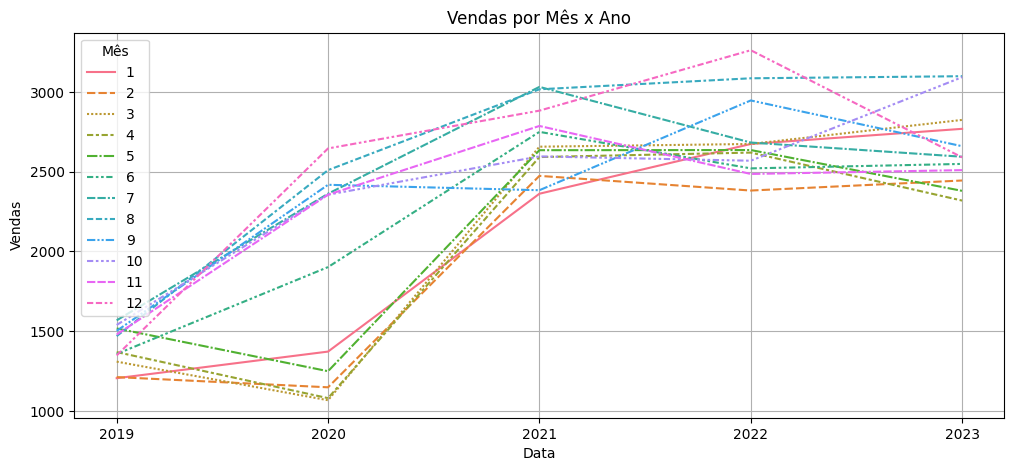

In [12]:
plt.figure(figsize = (12,5))
sns.lineplot(data = sales_general)
plt.xticks([2019, 2020, 2021, 2022, 2023])
plt.title('Vendas por Mês x Ano')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show();

## Pivot table

In [16]:
df_pivot = df.copy()

### Criação de classe de alta ou baixa nas vendas

In [19]:
df_pivot['pct_var'] = df_pivot['VENDAS'].pct_change(1).fillna(method = 'bfill')

df_pivot['Classe'] = np.where(df_pivot['pct_var'] > 0, 1, 0)

df_pivot

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   
2023-01-31  2023    1    2769          407         0.53         1637   
2023-02-28  2023    2    2445          316         0.84         1622   
2023-03-31  2023    3    2825          563         0.71         2094   
2023-04-30  2023    4    2319          484         0.61         1724   
2023-05-31  2023    5    2380          618         0.23         2183   
2023-06-30  2023    6    2549          601        -0.

### Pivot table das classes de alta e baixa das vendas

In [37]:
p_table = pd.pivot_table(df_pivot, index = ['Classe'],
               aggfunc = {'Mês': len,
                          'PARAMETRO 1': np.mean,
                          'PARAMETRO 2': np.mean, 
                          'PARAMETRO 3': np.mean,
                          'PARAMETRO 4': np.mean,
                          'PARAMETRO 5': np.mean,
                          'PARAMETRO 6': np.mean,
                          'PARAMETRO 7': np.mean,
                          'PARAMETRO 8': np.mean,
                          })

p_table

Mês  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  PARAMETRO 4  PARAMETRO 5  \
Classe                                                                         
0        25   716.120000     0.543600  1687.880000   25835122.2  51266254.96   
1        35   769.457143     0.425714  1908.114286   25287955.2  50646255.40   

         PARAMETRO 6  PARAMETRO 7   PARAMETRO 8  
Classe                                           
0       1.248362e+06   707.240000  11852.960000  
1       1.229034e+06   650.885714  12124.114286

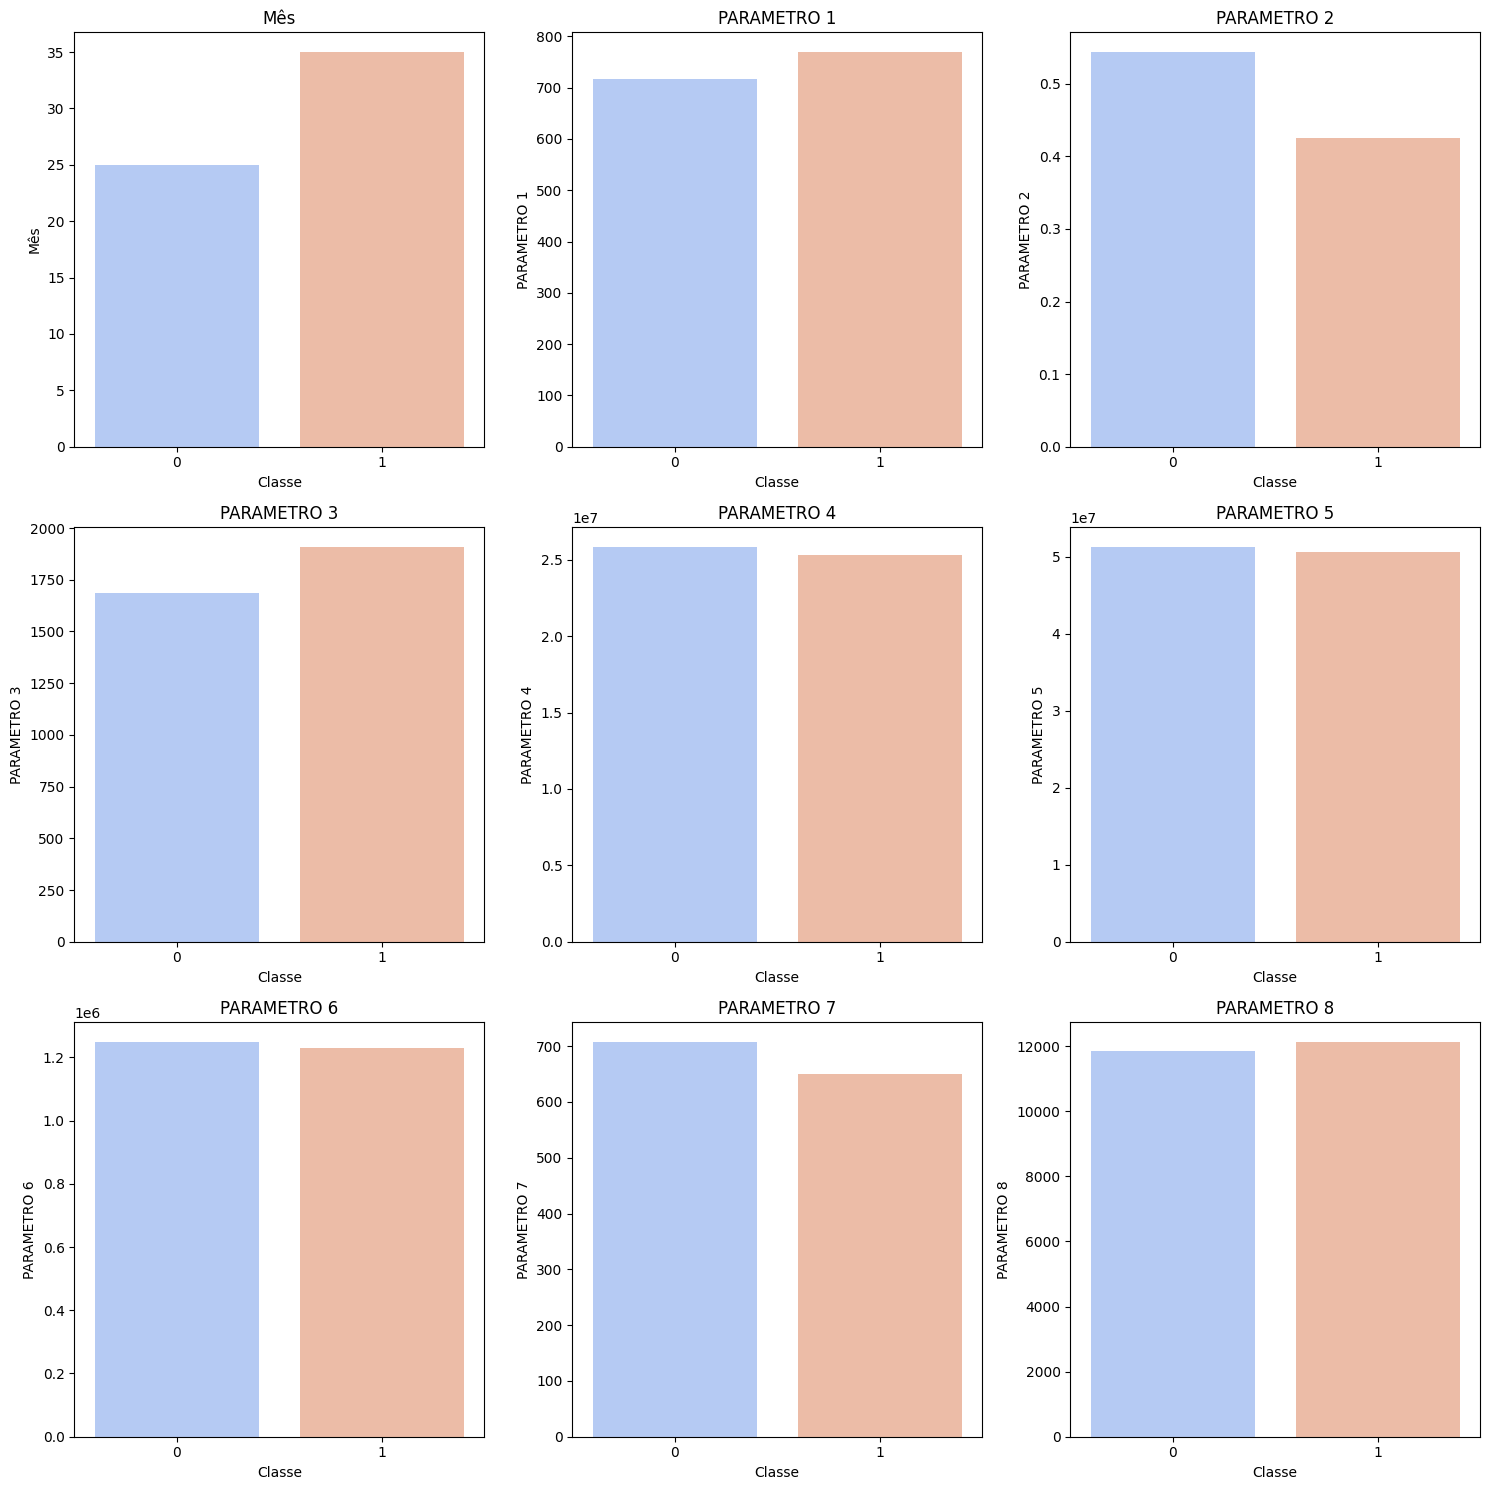

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

cols = p_table.columns.tolist()

# Gerar os gráficos
for i, col in enumerate(cols):
    sns.barplot(x = p_table.index, y=col, data = p_table, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Classe')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Correlações

### Correlação entre variáveis de todo a base de dados

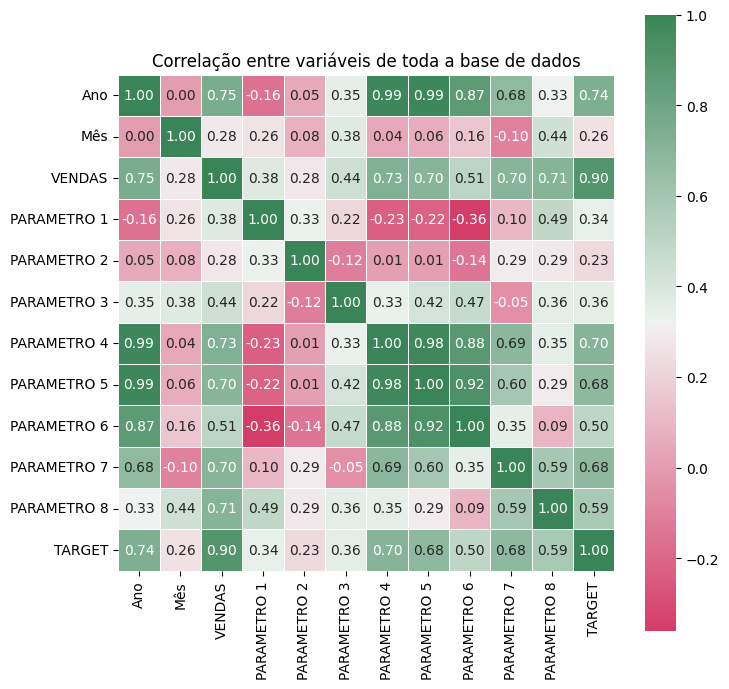

In [12]:
f, ax = plt.subplots(figsize = (8, 8))
corr = df.copy()
#corr.drop(['Ano', 'Mês'], axis = 1, inplace = True)
corr = corr.corr()


sns.heatmap(corr, annot = True, linewidths= 0.5, fmt = '.2f', 
            mask = np.zeros_like(corr, dtype=bool), 
            cmap = sns.diverging_palette(0, 500, as_cmap = True), 
            square = True, ax = ax)

plt.title('Correlação entre variáveis de toda a base de dados')

plt.show();

### Correlações das variáveis em cada ano da base de dados

In [13]:
sales_2019 = df.query("Ano == 2019")
sales_2019.drop(['Ano'], axis = 1, inplace = True)
corr_2019 = sales_2019.corr()
sales_2020 = df.query("Ano == 2020")
sales_2020.drop(['Ano'], axis = 1, inplace = True)
corr_2020 = sales_2020.corr()
sales_2021 = df.query("Ano == 2021")
sales_2021.drop(['Ano'], axis = 1, inplace = True)
corr_2021 = sales_2021.corr()
sales_2022 = df.query("Ano == 2022")
sales_2022.drop(['Ano'], axis = 1, inplace = True)
corr_2022 = sales_2022.corr()
sales_2023 = df.query("Ano == 2023")
sales_2023.drop(['Ano'], axis = 1, inplace = True)
corr_2023 = sales_2023.corr()

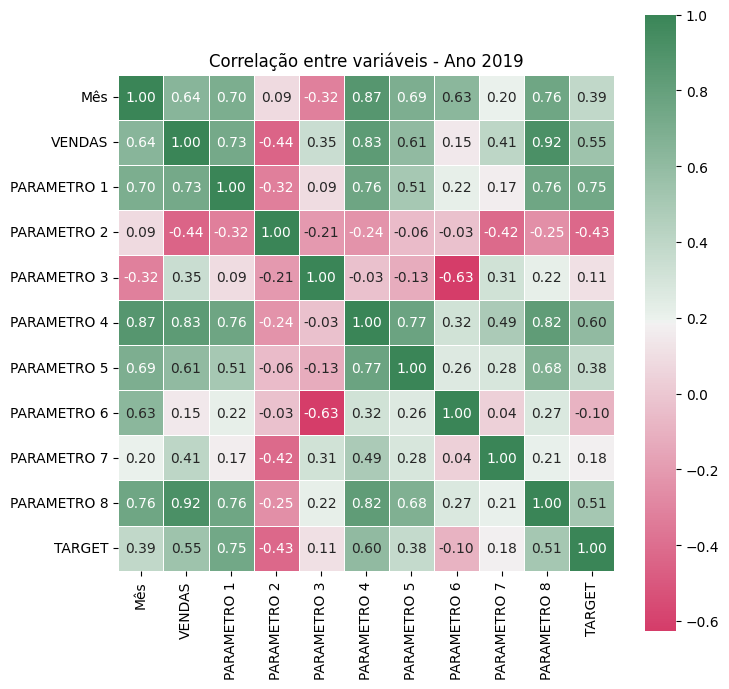

In [14]:
f, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corr_2019, annot = True, linewidths = 0.5, fmt = '.2f', 
            mask = np.zeros_like(corr_2019, dtype = bool), 
            cmap = sns.diverging_palette(0, 500, as_cmap = True), 
            square = True, ax = ax)

plt.title('Correlação entre variáveis - Ano 2019')

plt.show();

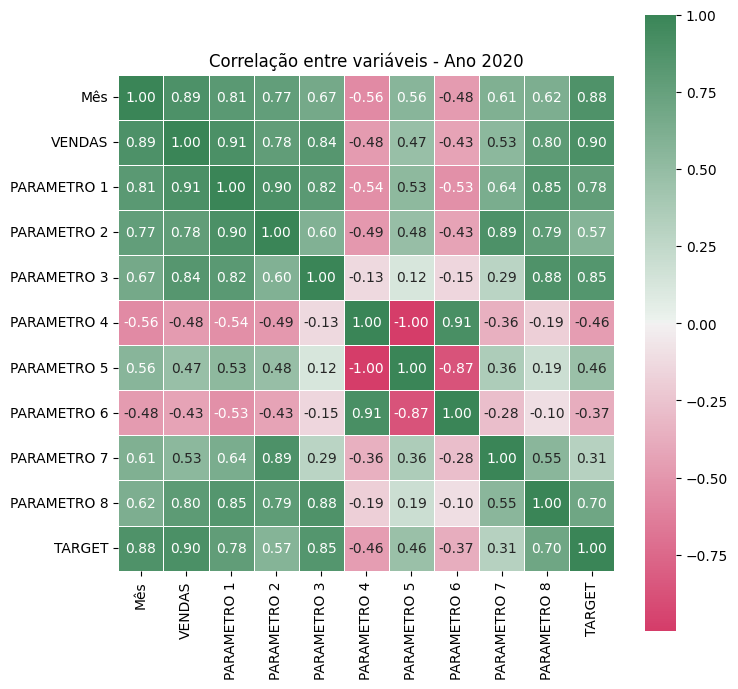

In [15]:
f, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corr_2020, annot = True, linewidths =0.5, fmt = '.2f', 
            mask = np.zeros_like(corr_2020, dtype = bool), 
            cmap = sns.diverging_palette(0, 500, as_cmap = True), 
            square = True, ax = ax)

plt.title('Correlação entre variáveis - Ano 2020')

plt.show();

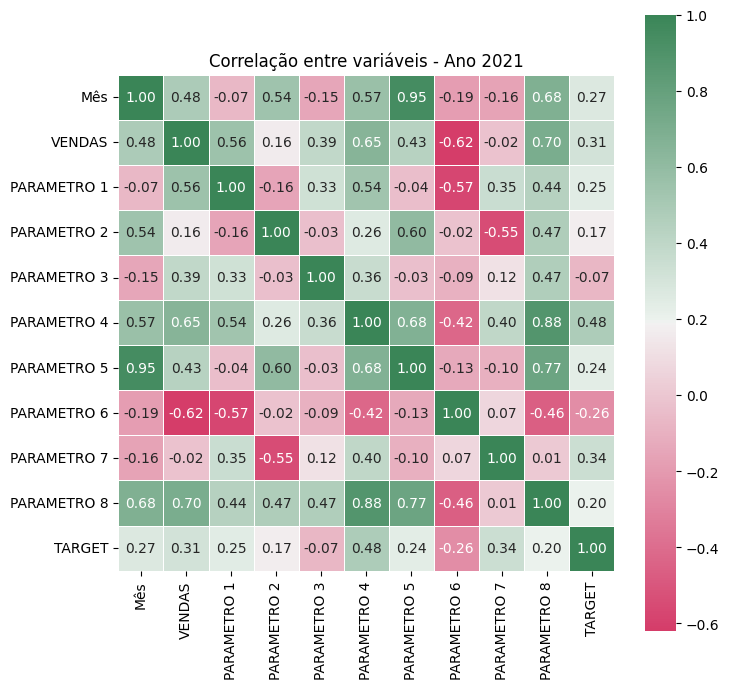

In [16]:
f, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corr_2021, annot = True, linewidths = 0.5, fmt= '.2f', 
            mask = np.zeros_like(corr_2021, dtype = bool), 
            cmap = sns.diverging_palette(0, 500, as_cmap = True), 
            square = True, ax = ax)

plt.title('Correlação entre variáveis - Ano 2021')

plt.show();

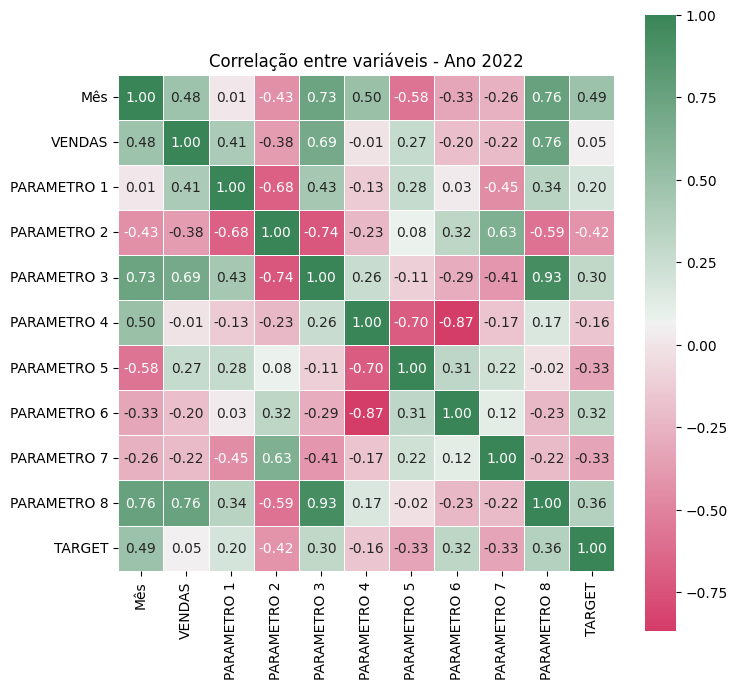

In [17]:
f, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corr_2022, annot = True, linewidths = 0.5, fmt ='.2f', 
            mask = np.zeros_like(corr_2022, dtype = bool), 
            cmap = sns.diverging_palette(0, 500, as_cmap = True), 
            square = True, ax = ax)

plt.title('Correlação entre variáveis - Ano 2022')

plt.show();

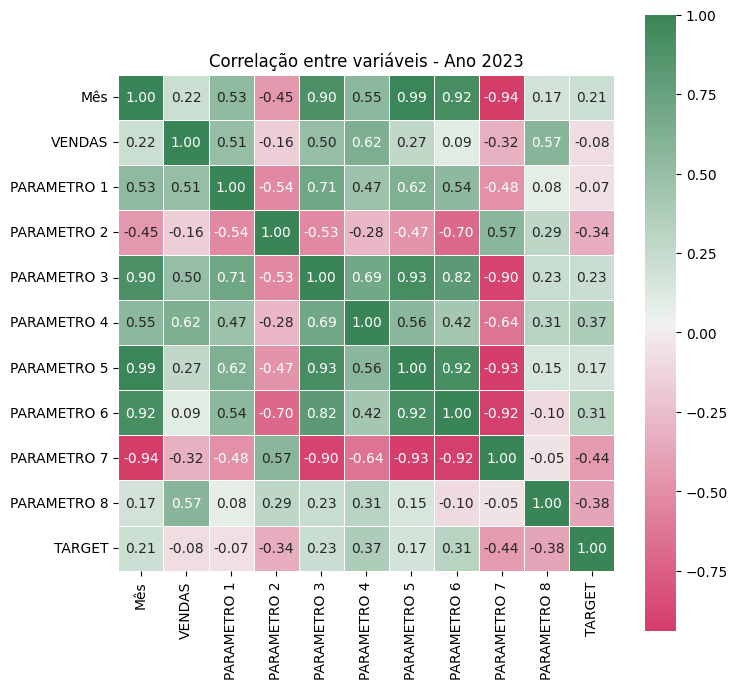

In [18]:
f, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corr_2023, annot = True, linewidths = 0.5, fmt = '.2f', 
            mask = np.zeros_like(corr_2023, dtype=bool), 
            cmap = sns.diverging_palette(0, 500, as_cmap = True), 
            square = True, ax = ax)

plt.title('Correlação entre variáveis - Ano 2023')

plt.show();

## Distribuições das variáveis

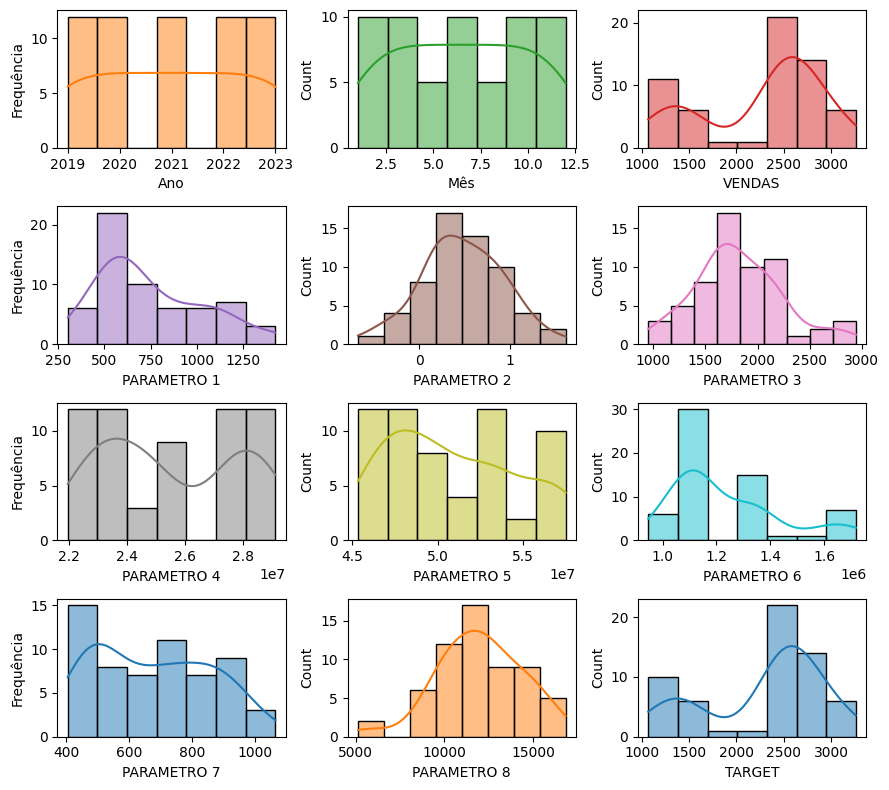

In [19]:
target = ['TARGET']
features = df.copy()

color_list = plt.cm.tab10(np.linspace(0, 1, 10)[list(range(10))+[0, 1]])
coi = target + [c for c in features if c not in target]  
feature_colors = {k: rgb2hex(color_list[i][:3]) for i, k in enumerate(coi)} if color_list is not None else {}

n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, n_rows * 2))
for i, (ax, col) in enumerate(zip(axes.flatten(), list(features.columns))):
    sns.histplot(features[col], color=feature_colors[col], ax = ax, kde = True)
    if i % n_cols == 0:
        ax.set_ylabel('Frequência')        
plt.tight_layout()
plt.show();

## Boxplot das variáveis

In [20]:
boxplot = df.copy()
#boxplot.drop(['Ano', 'Mês'], axis = 1, inplace = True)

scaler = StandardScaler()

boxplot_scaled = pd.DataFrame(scaler.fit_transform(boxplot), columns = boxplot.columns)

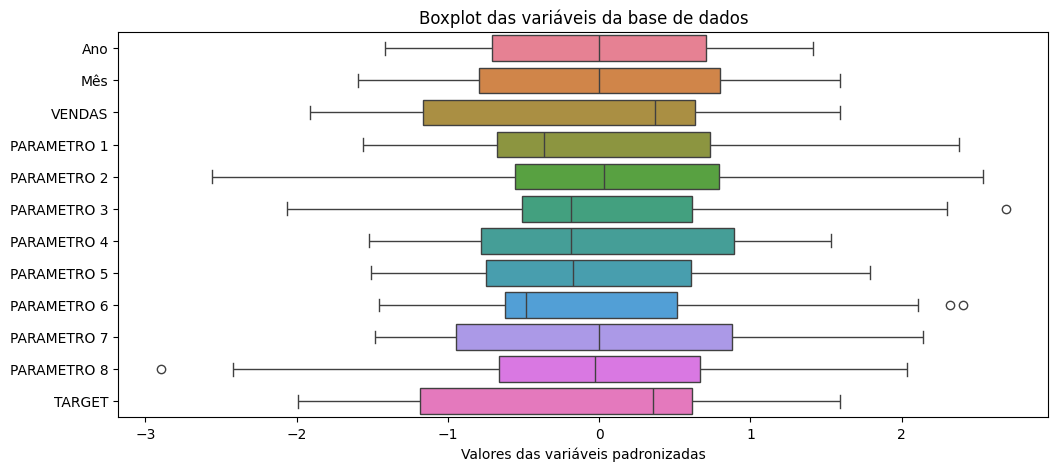

In [21]:
plt.figure(figsize = (12,5))
sns.boxplot(data = boxplot_scaled, orient = 'h')
plt.title('Boxplot das variáveis da base de dados')
plt.xlabel('Valores das variáveis padronizadas')
plt.show();

## Pairplot das variáveis dependentes em relação ao alvo

###  Pairplot de toda a base de dados

In [22]:
def custom_pairplot(df, target, variables, colors):
    # Ajustar o número de gráficos necessários (variáveis - 1)
    num_vars = len(variables) - 1
    num_cols = 3
    num_rows = (num_vars + num_cols - 1) // num_cols  # Cálculo para ajustar o número de linhas
    
    # Crie uma figura com subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
    
    # Flatten the axes array for easy indexing
    axes = axes.flatten()
    
    # Inicializa o índice dos eixos
    index = 0
    
    # Loop sobre as variáveis para criar os gráficos
    for var in variables:
        if var == target:
            continue  # Pule a variável alvo nas comparações
        
        # Verifica se ainda há eixos disponíveis
        if index >= len(axes):
            break
        
        ax = axes[index]
        
        # Gráfico da variável alvo contra a variável atual
        sns.scatterplot(x=df[target], y=df[var], ax=ax, color=colors[index % len(colors)])
        sns.regplot(x=df[target], y=df[var], ax=ax, scatter=False, color='black', line_kws={'linestyle': '--'})
        
        ax.set_xlabel(target)
        ax.set_ylabel(var)
        ax.grid(True)
        
        index += 1
    
    # Desative os eixos extras se houver menos gráficos do que subplots
    for idx in range(index, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [23]:
variaveis = features.columns.tolist()

colors = ['red']


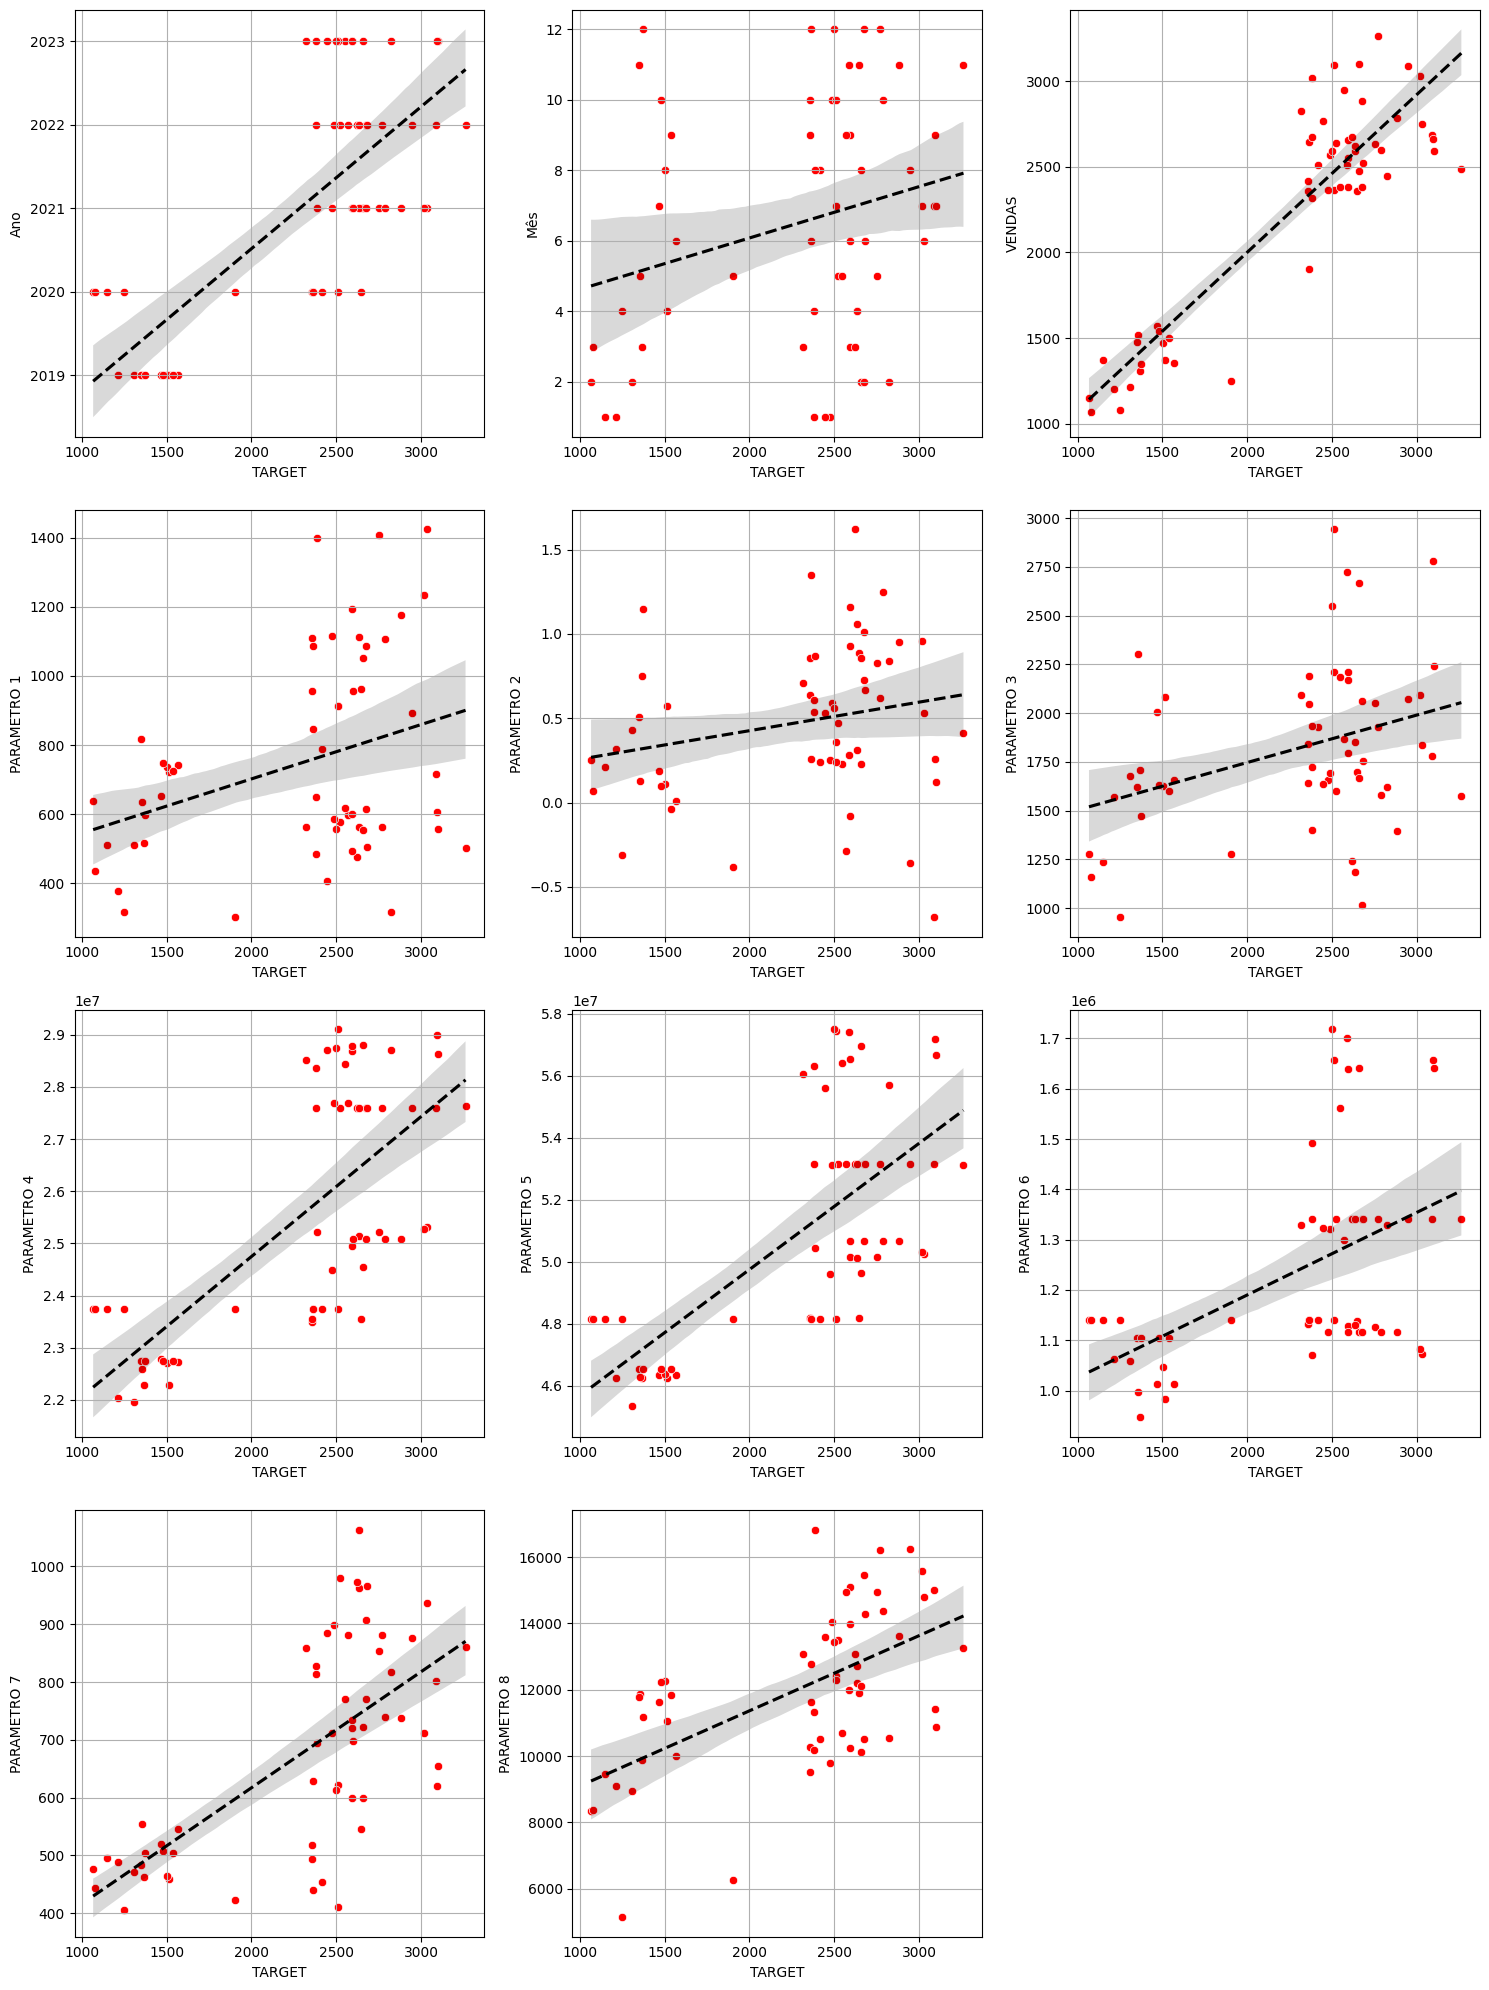

In [24]:
custom_pairplot(features, 'TARGET', variaveis, colors)

In [25]:
pairplot_year = features.drop('Ano', axis = 1)

vars_pairplot = pairplot_year.columns.tolist()

### Pairplot de cada ano

#### 2019

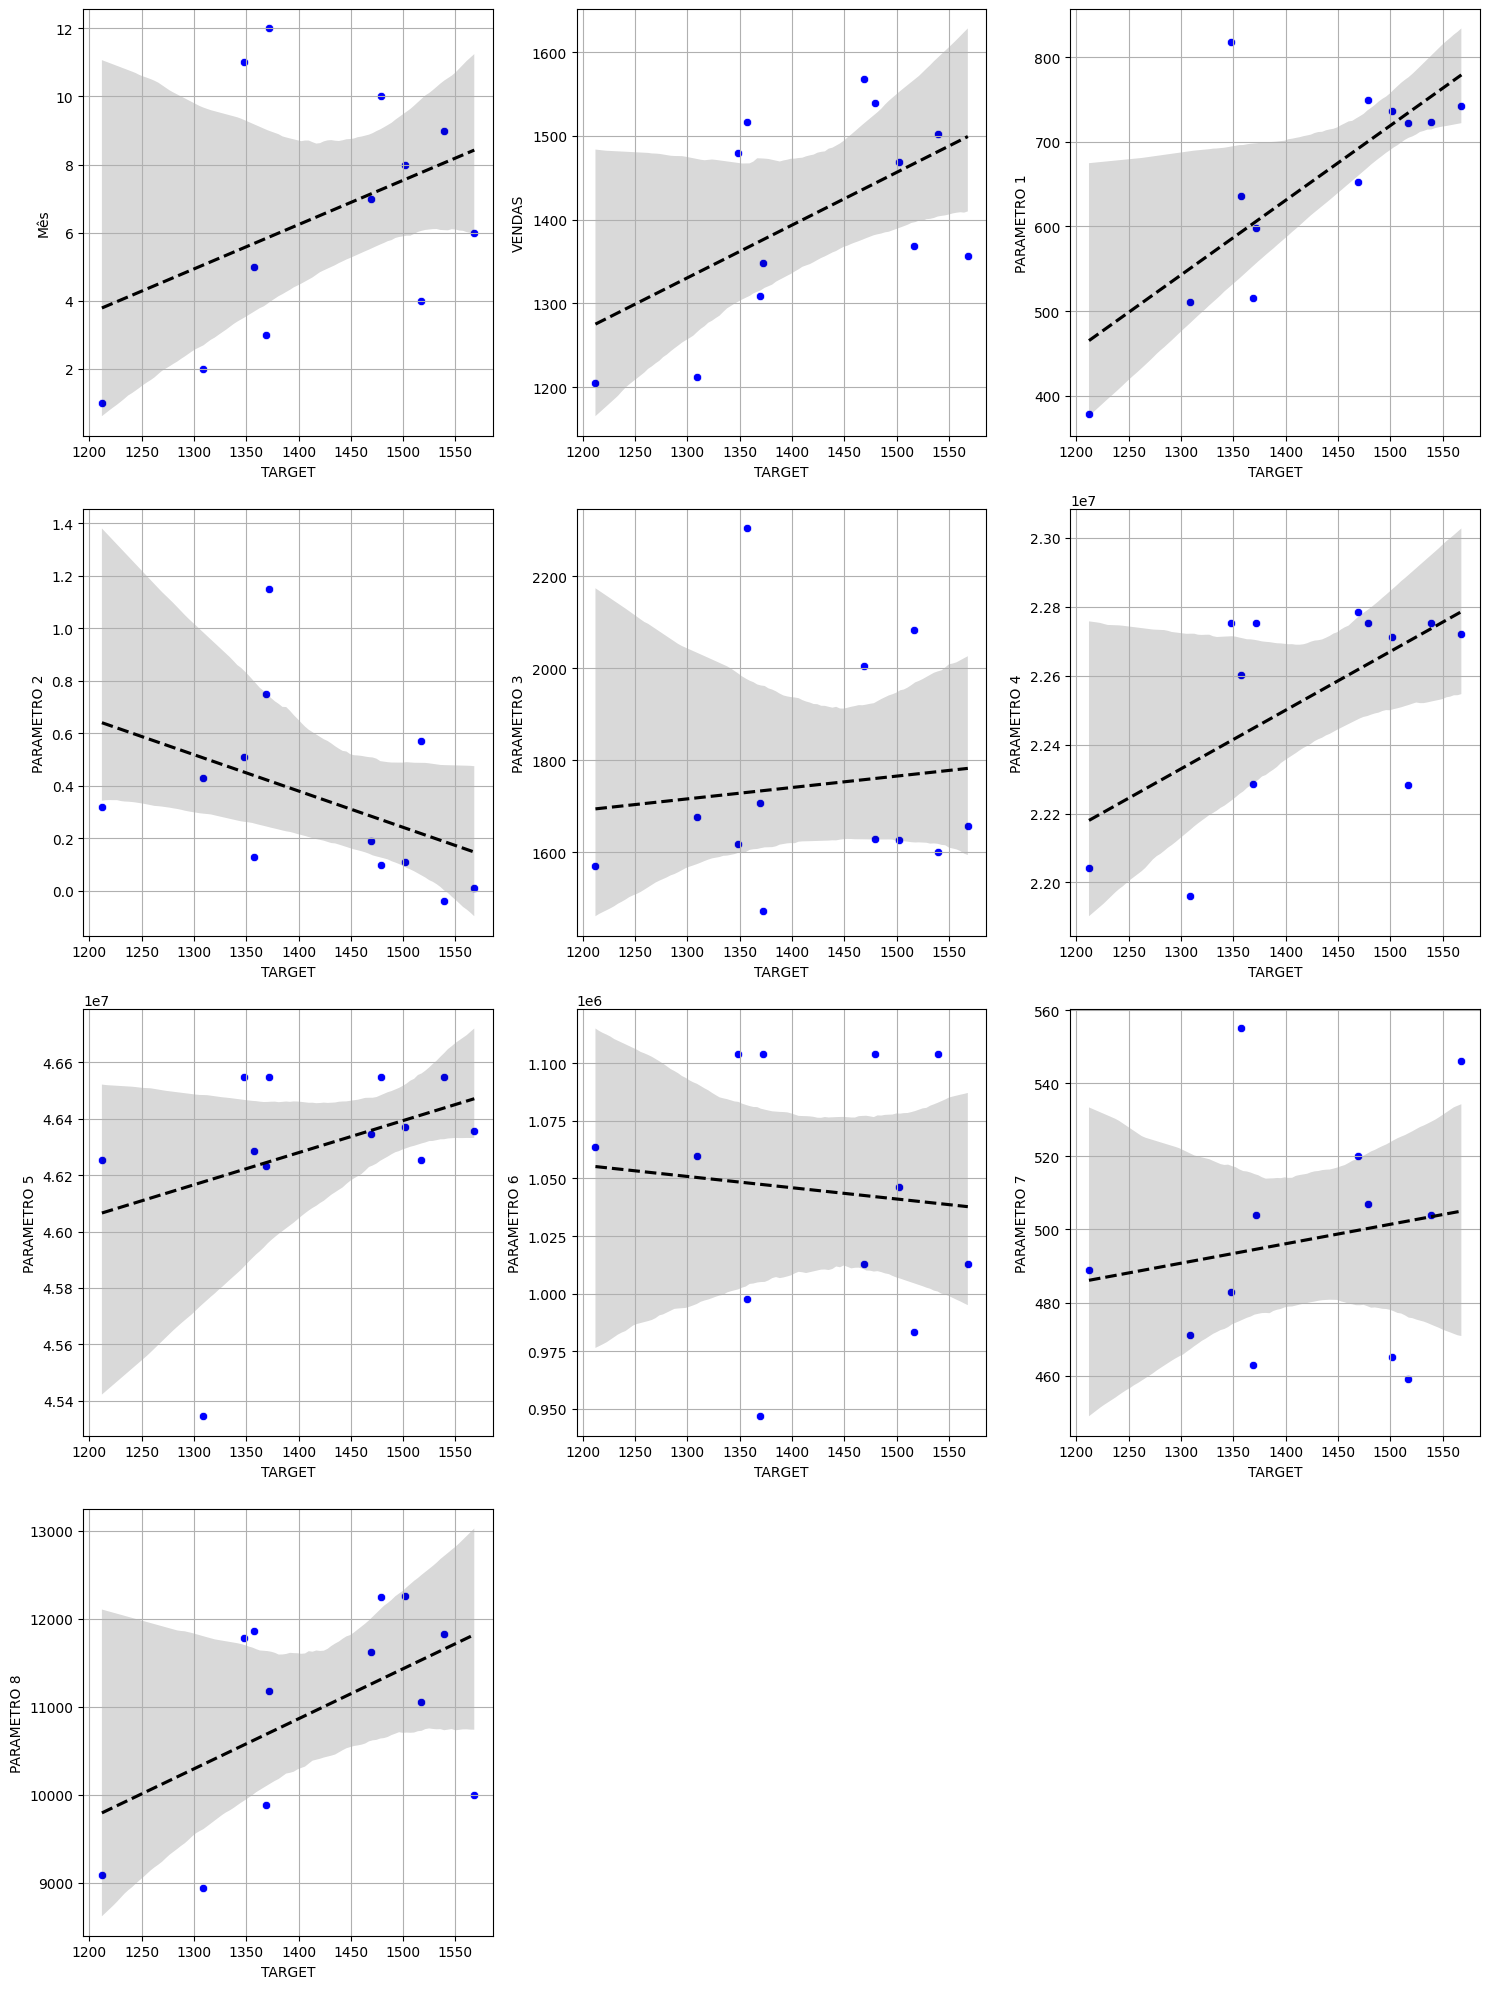

In [26]:
custom_pairplot(sales_2019, 'TARGET', vars_pairplot, ['blue'])

#### 2020

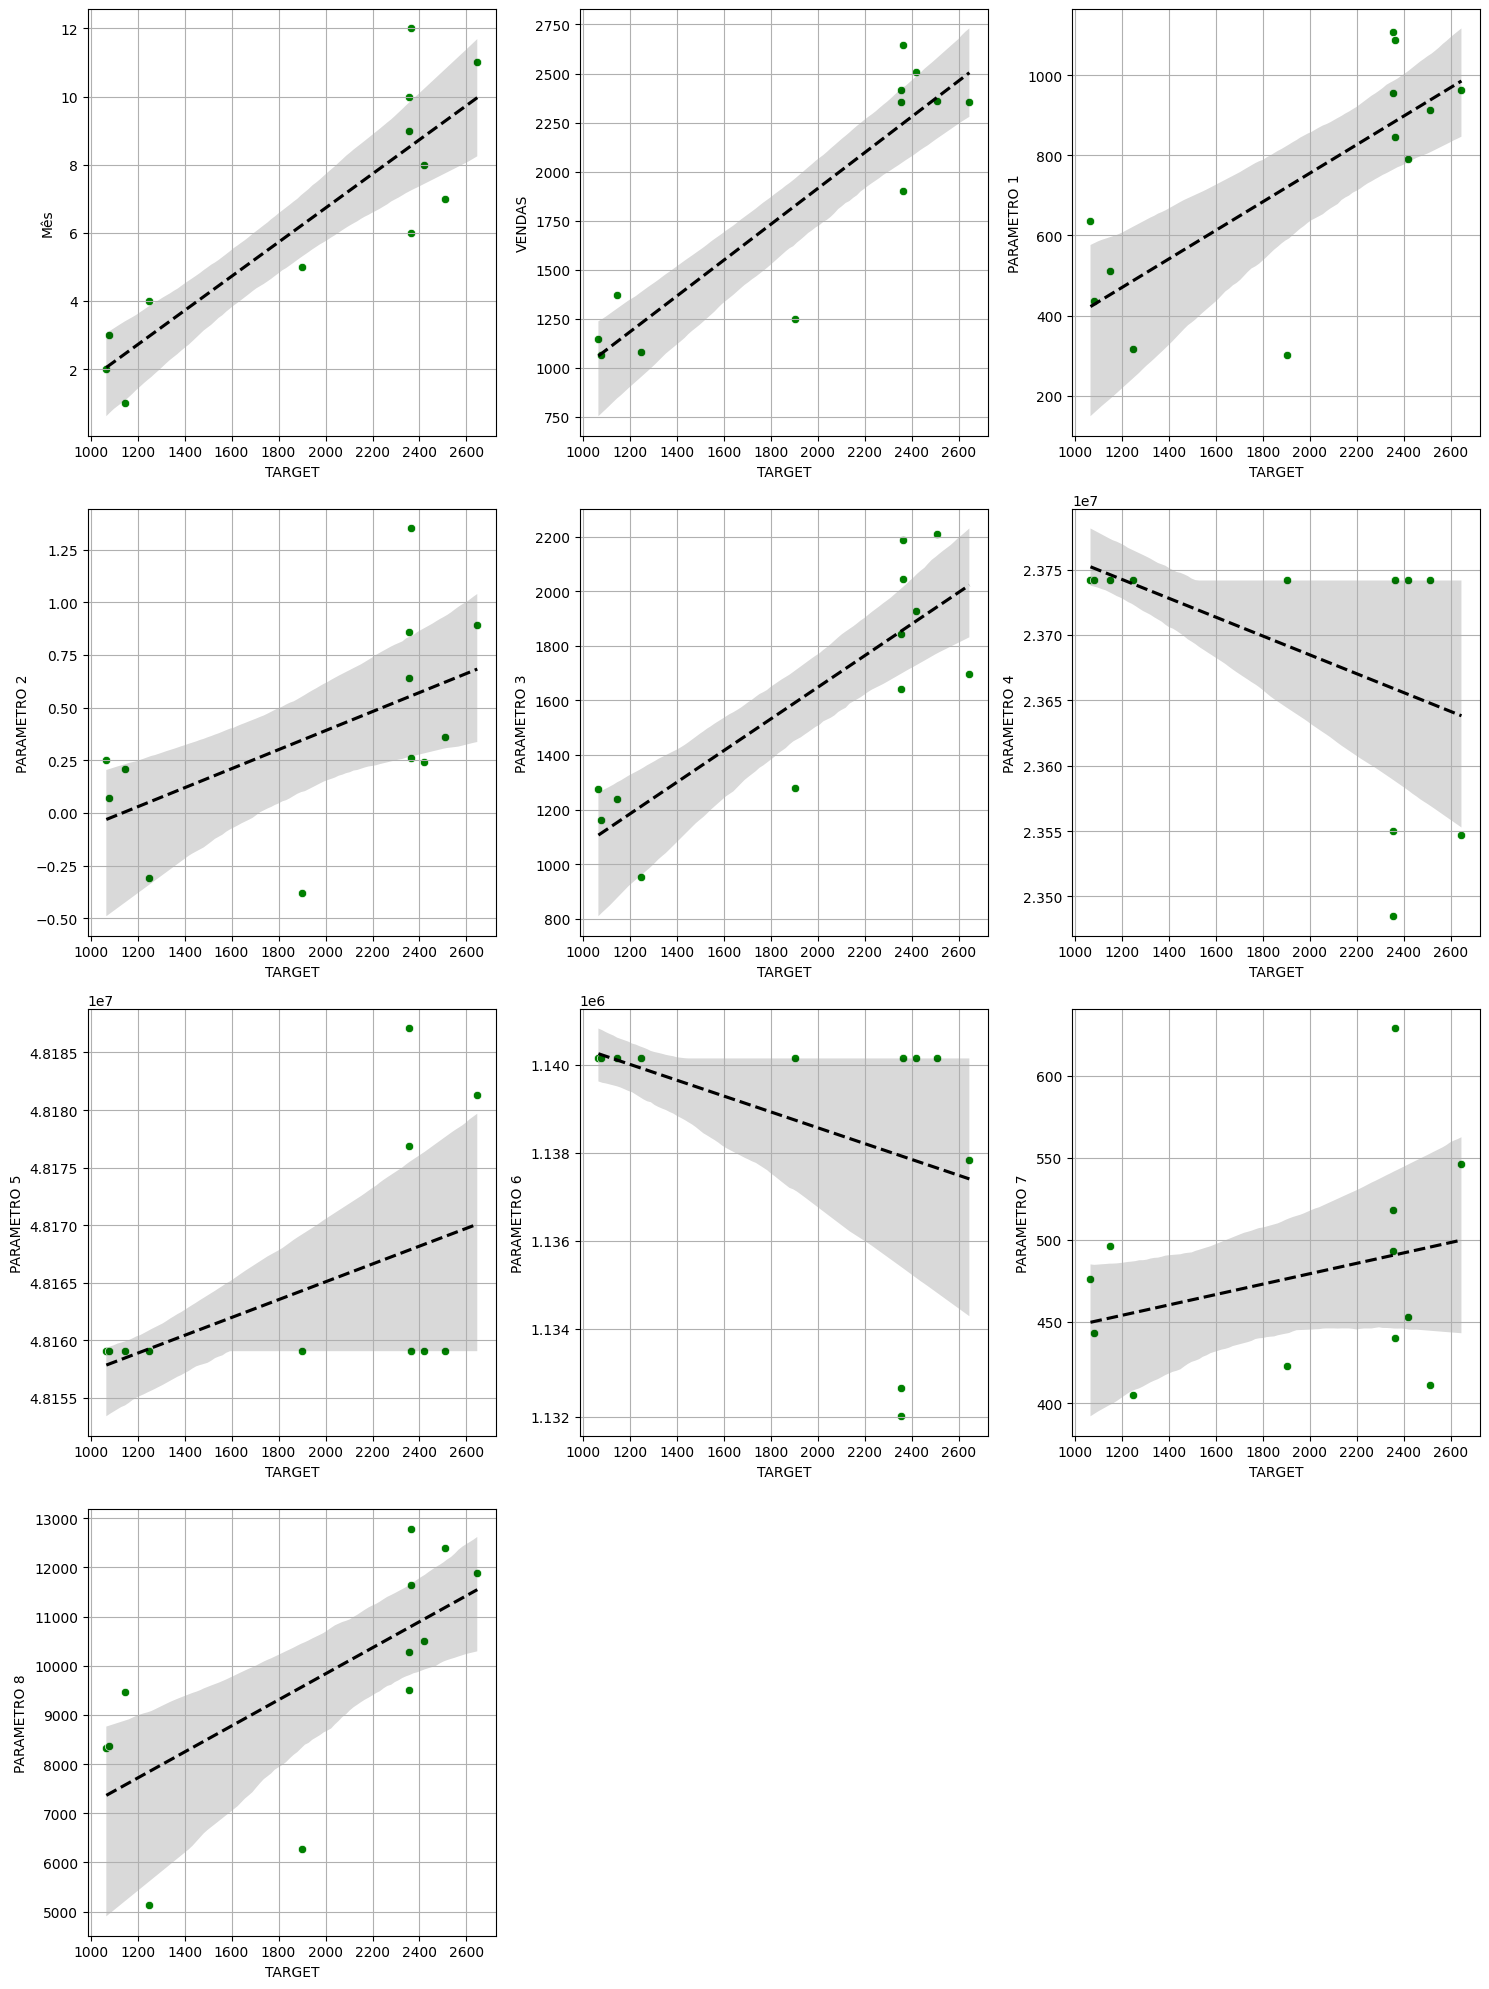

In [27]:
custom_pairplot(sales_2020, 'TARGET', vars_pairplot, ['green'])

#### 2021

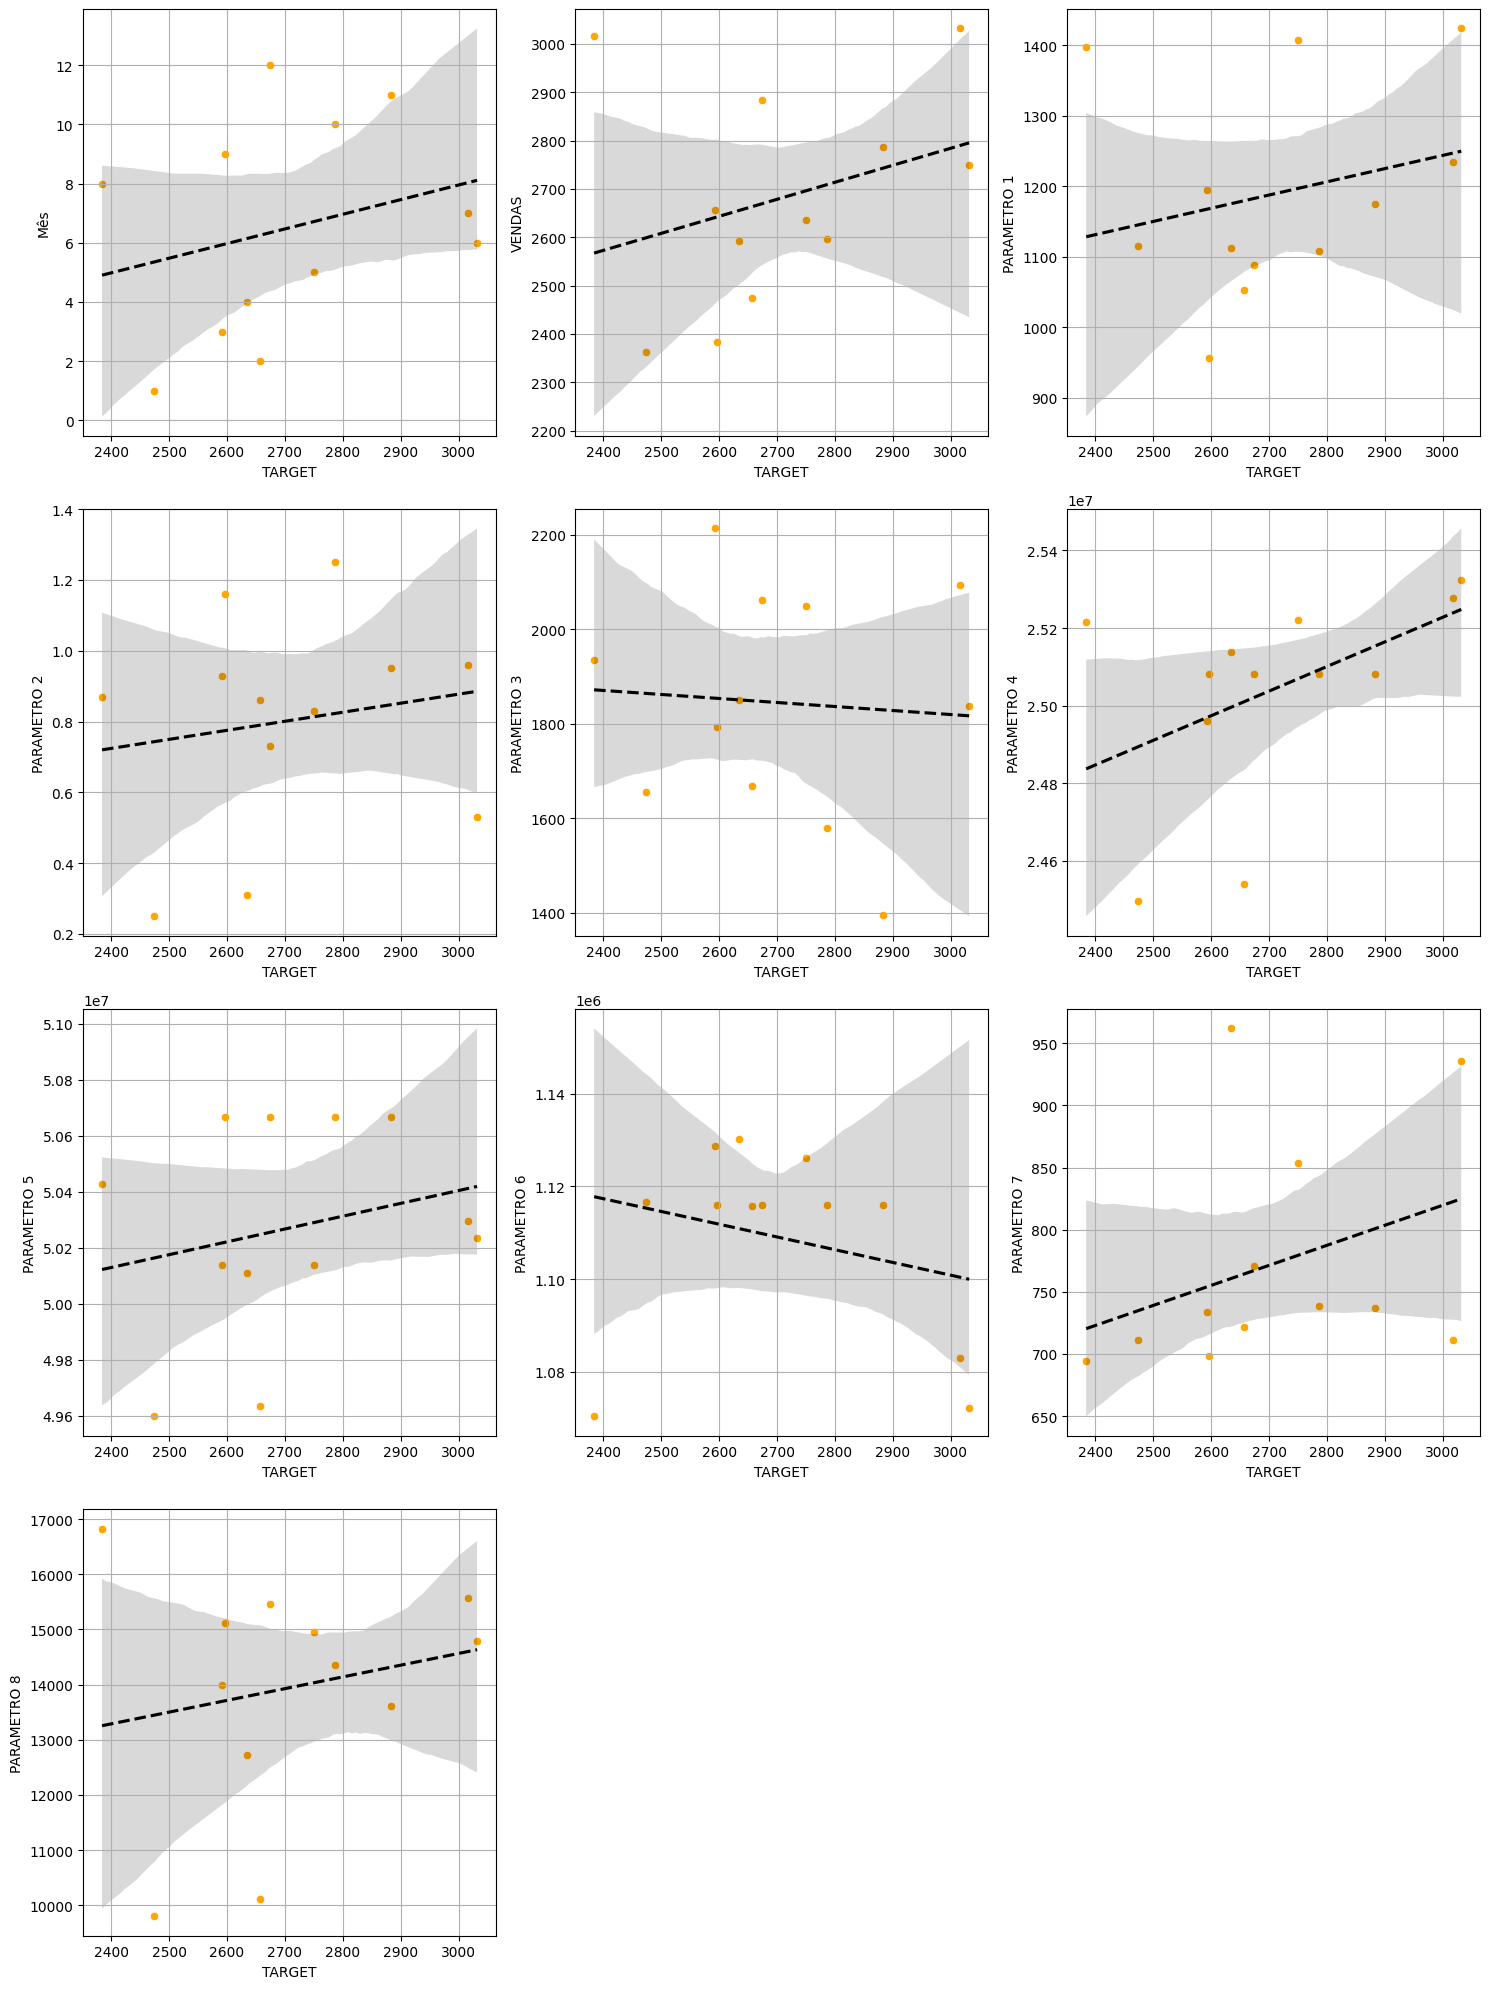

In [28]:
custom_pairplot(sales_2021, 'TARGET', vars_pairplot, ['orange'])

#### 2022

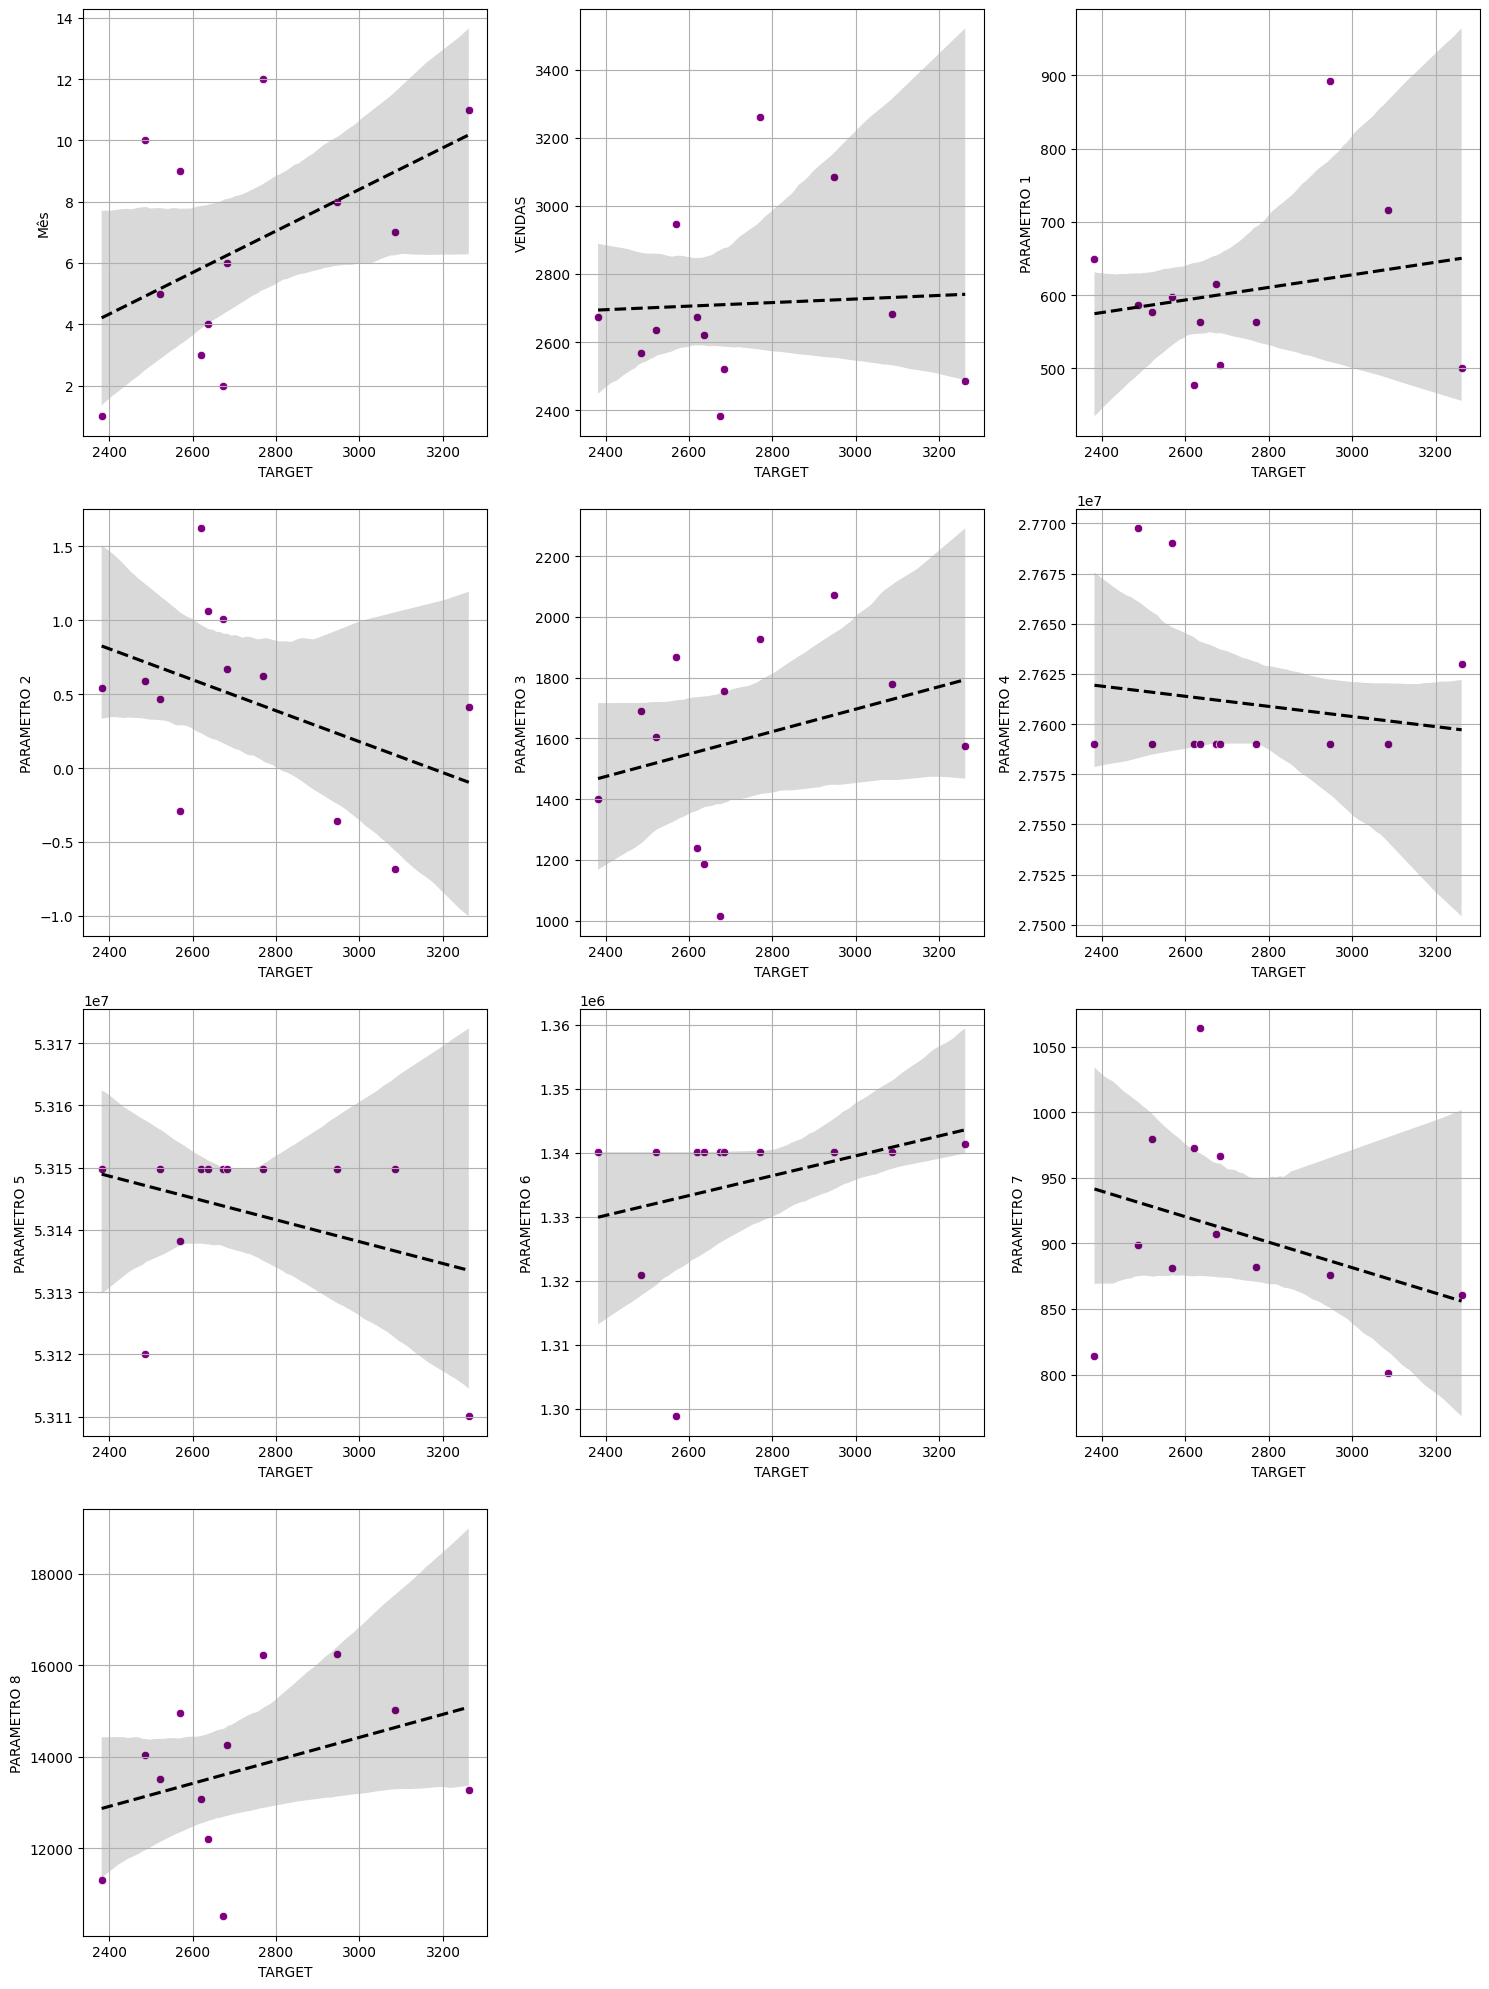

In [29]:
custom_pairplot(sales_2022, 'TARGET', vars_pairplot, ['purple'])

#### 2023

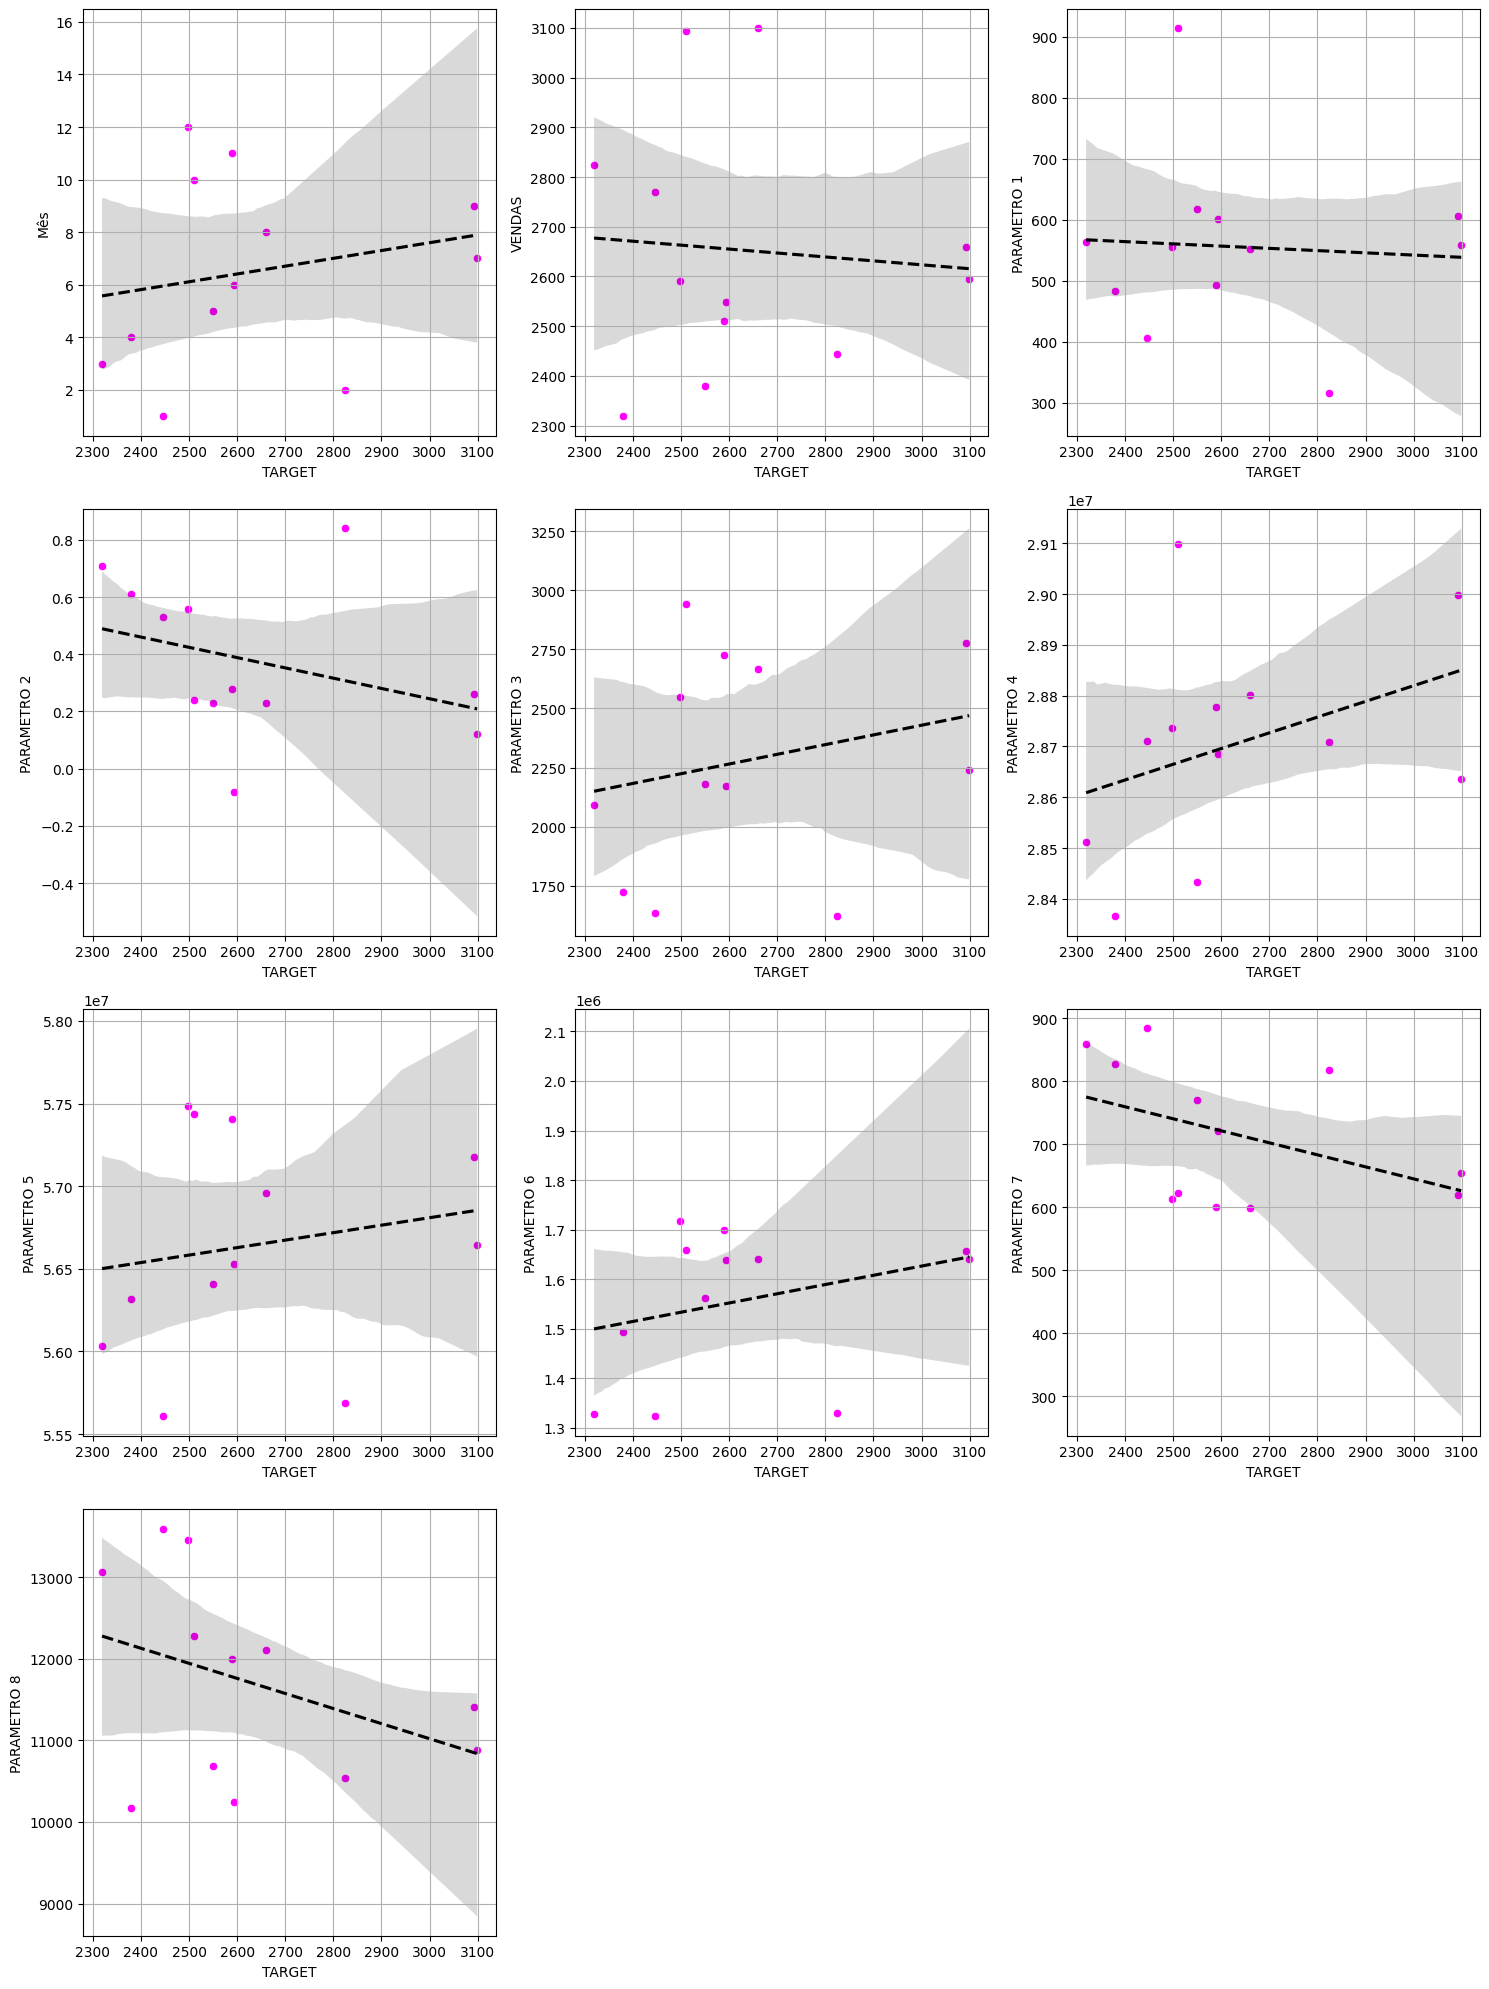

In [30]:
custom_pairplot(sales_2023, 'TARGET', vars_pairplot, ['magenta'])

## Autocorrelação dos valores da série de vendas

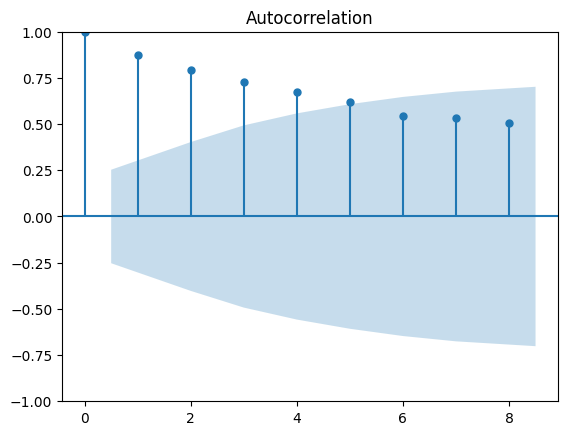

In [31]:
plot_acf(df['VENDAS'], lags = 8)
plt.show();

## Avaliação de outliers

In [32]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5*IQR
    UB = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < LB) | (df[ft] > UB)]
    
    return ls

In [33]:
index_list = []

for feature in variaveis:
    index_list.extend(outliers(features, feature))

In [34]:
print(f"Percentual de outliers em relação à toda base: {np.round(len(index_list)/len(features)*100, 2)} %")

Percentual de outliers em relação à toda base: 6.67 %


# Modelagem da previsão de vendas

## Preparação da base dados para modelagem

In [299]:
df_model = df.copy()

## Feature Engineering

### Lags do histórico de vendas

In [300]:
df_model['LAG_1'] = df_model['VENDAS'].shift(1).fillna(method = 'bfill')
df_model['LAG_2'] = df_model['VENDAS'].shift(2).fillna(method = 'bfill')
df_model['LAG_3'] = df_model['VENDAS'].shift(3).fillna(method = 'bfill')
df_model['LAG_4'] = df_model['VENDAS'].shift(4).fillna(method = 'bfill')
df_model['LAG_5'] = df_model['VENDAS'].shift(5).fillna(method = 'bfill')

### Diferenças do histórico de vendas

In [301]:
df_model['D1'] = df_model['VENDAS'].diff(1).fillna(method = 'bfill')
df_model['D2'] = df_model['VENDAS'].diff(2).fillna(method = 'bfill')
df_model['D3'] = df_model['VENDAS'].diff(3).fillna(method = 'bfill')
df_model['D4'] = df_model['VENDAS'].diff(4).fillna(method = 'bfill')
df_model['D5'] = df_model['VENDAS'].diff(5).fillna(method = 'bfill')

In [302]:
df_model

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   
2023-01-31  2023    1    2769          407         0.53         1637   
2023-02-28  2023    2    2445          316         0.84         1622   
2023-03-31  2023    3    2825          563         0.71         2094   
2023-04-30  2023    4    2319          484         0.61         1724   
2023-05-31  2023    5    2380          618         0.23         2183   
2023-06-30  2023    6    2549          601        -0.

In [303]:
df_pred_2024 = df_model.copy()

df_pred_2024.drop('TARGET', axis = 1, inplace = True)

In [304]:
df_pred_2024

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   
2023-01-31  2023    1    2769          407         0.53         1637   
2023-02-28  2023    2    2445          316         0.84         1622   
2023-03-31  2023    3    2825          563         0.71         2094   
2023-04-30  2023    4    2319          484         0.61         1724   
2023-05-31  2023    5    2380          618         0.23         2183   
2023-06-30  2023    6    2549          601        -0.

## Criação dos targets multi-step

In [305]:
df_model['TARGET_1'] = df_model['VENDAS'].shift(-2)
df_model['TARGET_2'] = df_model['VENDAS'].shift(-3)
df_model['TARGET_3'] = df_model['VENDAS'].shift(-4)
df_model['TARGET_4'] = df_model['VENDAS'].shift(-5)
df_model['TARGET_5'] = df_model['VENDAS'].shift(-6)
df_model['TARGET_6'] = df_model['VENDAS'].shift(-7)
df_model['TARGET_7'] = df_model['VENDAS'].shift(-8)
df_model['TARGET_8'] = df_model['VENDAS'].shift(-9)
df_model['TARGET_9'] = df_model['VENDAS'].shift(-10)
df_model['TARGET_10'] = df_model['VENDAS'].shift(-11)
df_model['TARGET_11'] = df_model['VENDAS'].shift(-12)


df_model

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   
2023-01-31  2023    1    2769          407         0.53         1637   
2023-02-28  2023    2    2445          316         0.84         1622   
2023-03-31  2023    3    2825          563         0.71         2094   
2023-04-30  2023    4    2319          484         0.61         1724   
2023-05-31  2023    5    2380          618         0.23         2183   
2023-06-30  2023    6    2549          601        -0.

### Remoção dos valores nulos

In [306]:
df_model.dropna(axis = 0, inplace = True)

df_model

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   
2021-12-31  2021   12    2883         1088         0.73         2061   
2022-01-31  2022    1    2674          650         0.54         1400   
2022-02-28  2022    2    2382          615         1.01         1014   
2022-03-31  2022    3    2674          477         1.62         1240   
2022-04-30  2022    4    2620          564         1.06         1186   
2022-05-31  2022    5    2636          577         0.47         1603   
2022-06-30  2022    6    2521          504         0.67         1754   
2022-07-31  2022    7    2683          716        -0.68         1780   
2022-08-31  2022    8    3086          893        -0.36         2071   
2022-09-30  2022    9    2947          598        -0.29         1868   
2022-10-31  2022   10    2569          586         0.59         1691   
2022-11-30  2022   11    2486          501         0.41         1573   
2022-12-31  2022   12    3262          564         0.62         1927   

            PARAMETRO 4  PARAMETRO 5  PARAMETRO 6  PARAMETRO 7  ...  TARGET_2  \
Data                                                            ...             
2019-01-31     22042272     46255529      1063499          489  ...    1369.0   
2019-02-28     21961658     45345128      1059560          471  ...    1517.0   
2019-03-31     22285348     46233883       946826          463  ...    1357.0   
2019-04

In [307]:
df_model.columns

Index(['Ano', 'Mês', 'VENDAS', 'PARAMETRO 1', 'PARAMETRO 2', 'PARAMETRO 3',
       'PARAMETRO 4', 'PARAMETRO 5', 'PARAMETRO 6', 'PARAMETRO 7',
       'PARAMETRO 8', 'TARGET', 'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'TARGET_1', 'TARGET_2', 'TARGET_3',
       'TARGET_4', 'TARGET_5', 'TARGET_6', 'TARGET_7', 'TARGET_8', 'TARGET_9',
       'TARGET_10', 'TARGET_11'],
      dtype='object')

## Separação da base de dados para treinamento e teste

In [308]:
train_split = 0.72

split_1 = int(np.round(len(df_model) * train_split, 0))
split_2 = split_1 + 1

df_train = df_model.iloc[:split_1, :]
df_test = df_model.iloc[split_2:, :]

print(df_train.shape)
print(df_test.shape)


(35, 33)
(12, 33)


### Separação do alvo das variáveis dependentes

In [309]:
X_train = df_train.drop(['TARGET', 'TARGET_1', 'TARGET_2', 'TARGET_3', 'TARGET_4',
       'TARGET_5', 'TARGET_6', 'TARGET_7', 'TARGET_8', 'TARGET_9', 'TARGET_10',
       'TARGET_11'], axis = 1)
y_train = df_train[['TARGET', 'TARGET_1', 'TARGET_2', 'TARGET_3', 'TARGET_4',
       'TARGET_5', 'TARGET_6', 'TARGET_7', 'TARGET_8', 'TARGET_9', 'TARGET_10',
       'TARGET_11']]

X_test = df_test.drop(['TARGET', 'TARGET_1', 'TARGET_2', 'TARGET_3', 'TARGET_4',
       'TARGET_5', 'TARGET_6', 'TARGET_7', 'TARGET_8', 'TARGET_9', 'TARGET_10',
       'TARGET_11'], axis = 1)
y_test = df_test[['TARGET', 'TARGET_1', 'TARGET_2', 'TARGET_3', 'TARGET_4',
       'TARGET_5', 'TARGET_6', 'TARGET_7', 'TARGET_8', 'TARGET_9', 'TARGET_10',
       'TARGET_11']]

In [310]:
X_train

Ano  Mês  VENDAS  PARAMETRO 1  PARAMETRO 2  PARAMETRO 3  \
Data                                                                   
2019-01-31  2019    1    1205          378         0.32         1570   
2019-02-28  2019    2    1212          511         0.43         1677   
2019-03-31  2019    3    1309          516         0.75         1708   
2019-04-30  2019    4    1369          722         0.57         2083   
2019-05-31  2019    5    1517          636         0.13         2304   
2019-06-30  2019    6    1357          742         0.01         1658   
2019-07-31  2019    7    1568          653         0.19         2005   
2019-08-31  2019    8    1469          737         0.11         1626   
2019-09-30  2019    9    1502          724        -0.04         1600   
2019-10-31  2019   10    1539          749         0.10         1629   
2019-11-30  2019   11    1479          818         0.51         1619   
2019-12-31  2019   12    1348          598         1.15         1472   
2020-01-31  2020    1    1372          511         0.21         1238   
2020-02-29  2020    2    1148          637         0.25         1277   
2020-03-31  2020    3    1067          437         0.07         1160   
2020-04-30  2020    4    1080          317        -0.31          953   
2020-05-31  2020    5    1249          302        -0.38         1278   
2020-06-30  2020    6    1902          846         0.26         2188   
2020-07-31  2020    7    2362          913         0.36         2211   
2020-08-31  2020    8    2510          790         0.24         1927   
2020-09-30  2020    9    2418          956         0.64         1641   
2020-10-31  2020   10    2356         1109         0.86         1842   
2020-11-30  2020   11    2356          962         0.89         1697   
2020-12-31  2020   12    2646         1088         1.35         2045   
2021-01-31  2021    1    2362         1115         0.25         1656   
2021-02-28  2021    2    2474         1053         0.86         1668   
2021-03-31  2021    3    2657         1195         0.93         2213   
2021-04-30  2021    4    2592         1112         0.31         1850   
2021-05-31  2021    5    2635         1408         0.83         2050   
2021-06-30  2021    6    2750         1424         0.53         1838   
2021-07-31  2021    7    3032         1234         0.96         2093   
2021-08-31  2021    8    3017         1398         0.87         1934   
2021-09-30  2021    9    2384          957         1.16         1794   
2021-10-31  2021   10    2596         1108         1.25         1580   
2021-11-30  2021   11    2787         1175         0.95         1396   

            PARAMETRO 4  PARAMETRO 5  PARAMETRO 6  PARAMETRO 7  ...   LAG_1  \
Data                                                            ...           
2019-01-31     22042272     46255529      1063499          489  ...  1205.0   
2019-02-28     21961658     45345128      1059560          471  ...  1205.0   
2019-03-31     22285348     46233883       946826          463  ...  1212.0   
2019-04-30     22283752     46253281       983368          459  ...  1309.0   
2019-05-31     22602871     46287072       997926          555  ...  1369.0   
2019-06-30     22720686     46355208      1012973          546  ...  1517.0   
2019-07-31     22784125     46344808      1013061          520  ...  1357.0   
2019-08-31     22713228     46370912      1046200          465  ...  1568.0   
2019-09-30     22752837     46546739      1104156          504  ...  1469.0   
2019-10-31     22752837     46546739      1104156          507  ...  1502.0   
2019-11-30     22752837     46546739      1104156          483  ...  1539.0   
2019-12-31     22752837     46546739      1104156          504  ...  1479.0   
2020-01-31     23741648     48159038      1140139          496  ...  1348.0   
2020-02-29     23741648     48159038      1140139          476  ...  1372.0   
2020-03-31     23741648     48159038      1140139          443  ...  1148.0   
2020-

In [311]:
X_train.columns

Index(['Ano', 'Mês', 'VENDAS', 'PARAMETRO 1', 'PARAMETRO 2', 'PARAMETRO 3',
       'PARAMETRO 4', 'PARAMETRO 5', 'PARAMETRO 6', 'PARAMETRO 7',
       'PARAMETRO 8', 'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5', 'D1', 'D2',
       'D3', 'D4', 'D5'],
      dtype='object')

In [312]:
y_train

TARGET  TARGET_1  TARGET_2  TARGET_3  TARGET_4  TARGET_5  \
Data                                                                   
2019-01-31  1212.0    1309.0    1369.0    1517.0    1357.0    1568.0   
2019-02-28  1309.0    1369.0    1517.0    1357.0    1568.0    1469.0   
2019-03-31  1369.0    1517.0    1357.0    1568.0    1469.0    1502.0   
2019-04-30  1517.0    1357.0    1568.0    1469.0    1502.0    1539.0   
2019-05-31  1357.0    1568.0    1469.0    1502.0    1539.0    1479.0   
2019-06-30  1568.0    1469.0    1502.0    1539.0    1479.0    1348.0   
2019-07-31  1469.0    1502.0    1539.0    1479.0    1348.0    1372.0   
2019-08-31  1502.0    1539.0    1479.0    1348.0    1372.0    1148.0   
2019-09-30  1539.0    1479.0    1348.0    1372.0    1148.0    1067.0   
2019-10-31  1479.0    1348.0    1372.0    1148.0    1067.0    1080.0   
2019-11-30  1348.0    1372.0    1148.0    1067.0    1080.0    1249.0   
2019-12-31  1372.0    1148.0    1067.0    1080.0    1249.0    1902.0   
2020-01-31  1148.0    1067.0    1080.0    1249.0    1902.0    2362.0   
2020-02-29  1067.0    1080.0    1249.0    1902.0    2362.0    2510.0   
2020-03-31  1080.0    1249.0    1902.0    2362.0    2510.0    2418.0   
2020-04-30  1249.0    1902.0    2362.0    2510.0    2418.0    2356.0   
2020-05-31  1902.0    2362.0    2510.0    2418.0    2356.0    2356.0   
2020-06-30  2362.0    2510.0    2418.0    2356.0    2356.0    2646.0   
2020-07-31  2510.0    2418.0    2356.0    2356.0    2646.0    2362.0   
2020-08-31  2418.0    2356.0    2356.0    2646.0    2362.0    2474.0   
2020-09-30  2356.0    2356.0    2646.0    2362.0    2474.0    2657.0   
2020-10-31  2356.0    2646.0    2362.0    2474.0    2657.0    2592.0   
2020-11-30  2646.0    2362.0    2474.0    2657.0    2592.0    2635.0   
2020-12-31  2362.0    2474.0    2657.0    2592.0    2635.0    2750.0   
2021-01-31  2474.0    2657.0    2592.0    2635.0    2750.0    3032.0   
2021-02-28  2657.0    2592.0    2635.0    2750.0    3032.0    3017.0   
2021-03-31  2592.0    2635.0    2750.0    3032.0    3017.0    2384.0   
2021-04-30  2635.0    2750.0    3032.0    3017.0    2384.0    2596.0   
2021-05-31  2750.0    3032.0    3017.0    2384.0    2596.0    2787.0   
2021-06-30  3032.0    3017.0    2384.0    2596.0    2787.0    2883.0   
2021-07-31  3017.0    2384.0    2596.0    2787.0    2883.0    2674.0   
2021-08-31  2384.0    2596.0    2787.0    2883.0    2674.0    2382.0   
2021-09-30  2596.0    2787.0    2883.0    2674.0    2382.0    2674.0   
2021-10-31  2787.0    2883.0    2674.0    2382.0    2674.0    2620.0   
2021-11-30  2883.0    2674.0    2382.0    2674.0    2620.0    2636.0   

            TARGET_6  TARGET_7  TARGET_8  TARGET_9  TARGET_10  TARGET_11  
Data                                                                      
2019-01-31    1469.0    1502.0    1539.0    1479.0     1348.0     1372.0  
2019-02-28    1502.0    1539.0    1479.0    1348.0     1372.0     1148.0  
2019-03-31    1539.0    1479.0    1348.0    1372.0     1148.0     1067.0  
2019-04-30    1479.0    1348.0    1372.0    1148.0     1067.0     1080.0  
2019-05-31    1348.0    1372.0    1148.0    1067.0     1080.0     1249.0  
2019-06-30    1372.0    1148.0    1067.0    1080.0     1249.0     1902.0  
2019-07-31    1148.0    1067.0    1080.0    1249.0     1902.0     2362.0  
2019-08-31    1067.0    1080.0    1249.0    1902.0     2362.0     2510.0  
2019-09-30    1080.0    1249.0    1902.0    2362.0     2510.0     2418.0  
2019-10-31    1249.0    1902.0    2362.0    2510.0     2418.0     2356.0  
2019-11-30    1902.0    2362.0    2510.0    2418.0     2356.0     2356.0  
2019-12-31    2362.0    2510.0    2418.0    2356.0     2356.0     2646.0  
2020-01-31    2510.0    2418.0    2356.0    2356.0     2646.0     2362.0  
2020-02-29    2418.0    2356.0    2356.0    2646.0     2362.0     2474.0  
2020-03-31    2356.0    2356.0    2646.0    2362.0     2474.0     2657.0  
2020-04-30    2356.0    2646.0    2362.0    2474.0     2657.0     2592.0

In [313]:
y_test

TARGET  TARGET_1  TARGET_2  TARGET_3  TARGET_4  TARGET_5  \
Data                                                                   
2022-01-31  2382.0    2674.0    2620.0    2636.0    2521.0    2683.0   
2022-02-28  2674.0    2620.0    2636.0    2521.0    2683.0    3086.0   
2022-03-31  2620.0    2636.0    2521.0    2683.0    3086.0    2947.0   
2022-04-30  2636.0    2521.0    2683.0    3086.0    2947.0    2569.0   
2022-05-31  2521.0    2683.0    3086.0    2947.0    2569.0    2486.0   
2022-06-30  2683.0    3086.0    2947.0    2569.0    2486.0    3262.0   
2022-07-31  3086.0    2947.0    2569.0    2486.0    3262.0    2769.0   
2022-08-31  2947.0    2569.0    2486.0    3262.0    2769.0    2445.0   
2022-09-30  2569.0    2486.0    3262.0    2769.0    2445.0    2825.0   
2022-10-31  2486.0    3262.0    2769.0    2445.0    2825.0    2319.0   
2022-11-30  3262.0    2769.0    2445.0    2825.0    2319.0    2380.0   
2022-12-31  2769.0    2445.0    2825.0    2319.0    2380.0    2549.0   

            TARGET_6  TARGET_7  TARGET_8  TARGET_9  TARGET_10  TARGET_11  
Data                                                                      
2022-01-31    3086.0    2947.0    2569.0    2486.0     3262.0     2769.0  
2022-02-28    2947.0    2569.0    2486.0    3262.0     2769.0     2445.0  
2022-03-31    2569.0    2486.0    3262.0    2769.0     2445.0     2825.0  
2022-04-30    2486.0    3262.0    2769.0    2445.0     2825.0     2319.0  
2022-05-31    3262.0    2769.0    2445.0    2825.0     2319.0     2380.0  
2022-06-30    2769.0    2445.0    2825.0    2319.0     2380.0     2549.0  
2022-07-31    2445.0    2825.0    2319.0    2380.0     2549.0     2594.0  
2022-08-31    2825.0    2319.0    2380.0    2549.0     2594.0     3099.0  
2022-09-30    2319.0    2380.0    2549.0    2594.0     3099.0     2660.0  
2022-10-31    2380.0    2549.0    2594.0    3099.0     2660.0     3093.0  
2022-11-30    2549.0    2594.0    3099.0    2660.0     3093.0     2510.0  
2022-12-31    2594.0    3099.0    2660.0    3093.0     2510.0     2590.0

## Construção do modelo baseline

In [157]:
dummy_model = DummyRegressor(strategy = 'mean')

In [117]:
dummy_multioutput = MultiOutputRegressor(dummy_model)

dummy_multioutput.fit(X_train, y_train)

MultiOutputRegressor(estimator=DummyRegressor())

### Previsões da baseline

In [118]:
y_pred_dummy = dummy_multioutput.predict(X_test)

### Avaliação das métricas da baseline (hold out)

In [119]:
baseline_mae = mean_absolute_error(y_test, y_pred_dummy)
baseline_rmse = mean_squared_error(y_test, y_pred_dummy)
baseline_mape = mean_absolute_percentage_error(y_test, y_pred_dummy)
mae_p_baseline = baseline_mae/y_test.mean(axis = 0).mean()

print(f'MAE da baseline: {baseline_mae:.2f}')
print(f'RMSE da baseline: {baseline_rmse:.2f}')
print(f'MAPE da baseline: {baseline_mape:.2%}')
print(f'Percentual do MAE em relação à média da base: {mae_p_baseline:.2%}')

MAE da baseline: 496.82
RMSE da baseline: 336660.69
MAPE da baseline: 17.61%
Percentual do MAE em relação à média da base: 18.41%


## Utilização de modelo autoregressivo - ARIMA

### Visualização de ACF e PACF

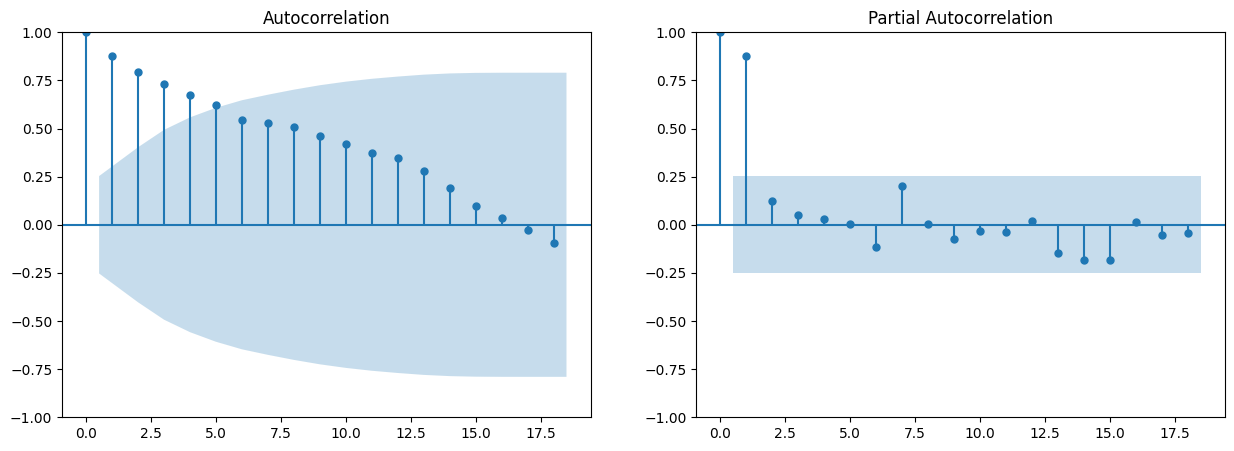

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['VENDAS'], ax=axes[0])
plot_pacf(df['VENDAS'], ax=axes[1])
plt.show()

### Fit do modelo ARIMA

In [ ]:
model = ARIMA(df_train['TARGET'], order=(5, 1, 3))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 TARGET   No. Observations:                   35
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -229.237
Date:                Wed, 18 Sep 2024   AIC                            476.474
Time:                        16:23:28   BIC                            490.211
Sample:                    01-31-2019   HQIC                           481.159
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1057      1.332      0.079      0.937      -2.504       2.716
ar.L2          0.1914      0.957      0.200      0.841      -1.684       2.067
ar.L3          0.6619      0.881      0.751      0.4

### Previsão ARIMA

In [ ]:
forecast = model_fit.forecast(steps=12)

In [ ]:
forecast

2021-12-31    2991.148433
2022-01-31    2861.167433
2022-02-28    2895.071774
2022-03-31    2976.206072
2022-04-30    2903.398224
2022-05-31    3004.510576
2022-06-30    3005.240765
2022-07-31    2963.397435
2022-08-31    3072.030544
2022-09-30    3024.357582
2022-10-31    3043.247191
2022-11-30    3120.361916
Freq: ME, Name: predicted_mean, dtype: float64

### Métricas do modelo ARIMA

In [ ]:
arima_mae = mean_absolute_error(y_test['TARGET'], forecast)
arima_rmse = mean_squared_error(y_test['TARGET'], forecast)
arima_mape = mean_absolute_percentage_error(y_test['TARGET'], forecast)
mae_p_arima = arima_mae/y_test.mean(axis = 0).mean()

print(f'MAE ARIMA: {arima_mae:.2f}')
print(f'RMSE ARIMA: {arima_rmse:.2f}')
print(f'MAPE ARIMA: {arima_mape:.2%}')
print(f'Percentual do MAE em relação à média da base: {mae_p_arima:.2%}')

MAE ARIMA: 318.68
RMSE ARIMA: 130671.92
MAPE ARIMA: 12.24%
Percentual do MAE em relação à média da base: 11.81%


## Treinamento do modelo final

In [269]:
def tune_model(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params

    model = ExtraTreesRegressor(n_estimators = n_estimators,
                                max_depth = max_depth,
                                min_samples_split = min_samples_split,
                                min_samples_leaf = min_samples_leaf,
                                criterion = 'absolute_error', 
                                bootstrap = False, 
                                random_state = 42)
    
    m_output = MultiOutputRegressor(model)
    m_output.fit(X_train, y_train)

    p = m_output.predict(X_test)

    metric = mean_absolute_error(y_test, p)

    print(params, metric)

    return metric

In [270]:
space = [(100, 1000), #n_estimators
         (3, 15), #max_depth
         (2, 20), #min_samples_split
         (1, 20)] #min_samples_leaf

res = gp_minimize(tune_model, space, random_state = 0, verbose = 1, n_calls = 50)

Iteration No: 1 started. Evaluating function at random point.
[634, 13, 17, 17] 247.45803211531722
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.6972
Function value obtained: 247.4580
Current minimum: 247.4580
Iteration No: 2 started. Evaluating function at random point.
[661, 8, 7, 2] 211.946225205917
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.5236
Function value obtained: 211.9462
Current minimum: 211.9462
Iteration No: 3 started. Evaluating function at random point.
[345, 9, 17, 10] 228.99055958132044
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.7974
Function value obtained: 228.9906
Current minimum: 211.9462
Iteration No: 4 started. Evaluating function at random point.
[454, 13, 8, 13] 234.61439977973566
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.2901
Function value obtained: 234.6144
Current minimum: 211.9462
Iteration No: 5 started. Evaluating function at random point.
[431, 14,

In [314]:
opt_params = res.x

In [315]:
opt_params

[303, 15, 5, 1]

### Seleção randômica de variáveis

In [316]:
fs = []

for seed in range(100):
    
    np.random.seed(seed)
    k = np.random.randint(7, 14, 1)[0]
    selected = np.random.choice(X_train.columns, k, replace = False)
    
    Xtr_ = X_train[selected]
    Xtest_ = X_test[selected]
    
    mdl = ExtraTreesRegressor(n_estimators = opt_params[0],
                                max_depth = opt_params[1],
                                min_samples_split = opt_params[2],
                                min_samples_leaf = opt_params[3],
                                criterion = 'absolute_error', 
                                bootstrap = False, 
                                random_state = 42)
    
    motp = MultiOutputRegressor(mdl)  

    motp.fit(Xtr_, y_train)
    
    p = motp.predict(Xtr_)
    p_ = motp.predict(Xtest_)
    
    score_train = mean_absolute_error(y_train, p)
    score_test = mean_absolute_error(y_test, p_)
    
    if (score_test < 209):
        print("seed = {} - k = {} - score_train = {} - score_test = {}".format(seed, k, score_train, score_test))
        fs.append([seed, p, p_])

seed = 3 - k = 9 - score_train = 42.61940122583686 - score_test = 208.27981756508984
seed = 45 - k = 10 - score_train = 45.28340405469118 - score_test = 200.45519343601026
seed = 47 - k = 13 - score_train = 40.850699355649844 - score_test = 207.99869361936192
seed = 70 - k = 13 - score_train = 38.64147414741475 - score_test = 207.38259763476344


In [317]:
np.random.seed(45)
k = np.random.randint(7, 14, 1)[0]
selected = np.random.choice(X_train.columns, k, replace = False)
X_train = X_train[selected]
X_test = X_test[selected]

X_train.columns

Index(['LAG_2', 'D1', 'D3', 'D4', 'LAG_1', 'VENDAS', 'D2', 'LAG_3',
       'PARAMETRO 8', 'PARAMETRO 5'],
      dtype='object')

In [318]:
X_train

LAG_2     D1      D3      D4   LAG_1  VENDAS      D2   LAG_3  \
Data                                                                        
2019-01-31  1205.0    7.0   164.0   312.0  1205.0    1205   104.0  1205.0   
2019-02-28  1205.0    7.0   164.0   312.0  1205.0    1212   104.0  1205.0   
2019-03-31  1205.0   97.0   164.0   312.0  1212.0    1309   104.0  1205.0   
2019-04-30  1212.0   60.0   164.0   312.0  1309.0    1369   157.0  1205.0   
2019-05-31  1309.0  148.0   305.0   312.0  1369.0    1517   208.0  1212.0   
2019-06-30  1369.0 -160.0    48.0   145.0  1517.0    1357   -12.0  1309.0   
2019-07-31  1517.0  211.0   199.0   259.0  1357.0    1568    51.0  1369.0   
2019-08-31  1357.0  -99.0   -48.0   100.0  1568.0    1469   112.0  1517.0   
2019-09-30  1568.0   33.0   145.0   -15.0  1469.0    1502   -66.0  1357.0   
2019-10-31  1469.0   37.0   -29.0   182.0  1502.0    1539    70.0  1568.0   
2019-11-30  1502.0  -60.0    10.0   -89.0  1539.0    1479   -23.0  1469.0   
2019-12-31  1539.0 -131.0  -154.0  -121.0  1479.0    1348  -191.0  1502.0   
2020-01-31  1479.0   24.0  -167.0  -130.0  1348.0    1372  -107.0  1539.0   
2020-02-29  1348.0 -224.0  -331.0  -391.0  1372.0    1148  -200.0  1479.0   
2020-03-31  1372.0  -81.0  -281.0  -412.0  1148.0    1067  -305.0  1348.0   
2020-04-30  1148.0   13.0  -292.0  -268.0  1067.0    1080   -68.0  1372.0   
2020-05-31  1067.0  169.0   101.0  -123.0  1080.0    1249   182.0  1148.0   
2020-06-30  1080.0  653.0   835.0   754.0  1249.0    1902   822.0  1067.0   
2020-07-31  1249.0  460.0  1282.0  1295.0  1902.0    2362  1113.0  1080.0   
2020-08-31  1902.0  148.0  1261.0  1430.0  2362.0    2510   608.0  1249.0   
2020-09-30  2362.0  -92.0   516.0  1169.0  2510.0    2418    56.0  1902.0   
2020-10-31  2510.0  -62.0    -6.0   454.0  2418.0    2356  -154.0  2362.0   
2020-11-30  2418.0    0.0  -154.0    -6.0  2356.0    2356   -62.0  2510.0   
2020-12-31  2356.0  290.0   228.0   136.0  2356.0    2646   290.0  2418.0   
2021-01-31  2356.0 -284.0     6.0   -56.0  2646.0    2362     6.0  2356.0   
2021-02-28  2646.0  112.0   118.0   118.0  2362.0    2474  -172.0  2356.0   
2021-03-31  2362.0  183.0    11.0   301.0  2474.0    2657   295.0  2646.0   
2021-04-30  2474.0  -65.0   230.0   -54.0  2657.0    2592   118.0  2362.0   
2021-05-31  2657.0   43.0   161.0   273.0  2592.0    2635   -22.0  2474.0   
2021-06-30  2592.0  115.0    93.0   276.0  2635.0    2750   158.0  2657.0   
2021-07-31  2635.0  282.0   440.0   375.0  2750.0    3032   397.0  2592.0   
2021-08-31  2750.0  -15.0   382.0   425.0  3032.0    3017   267.0  2635.0   
2021-09-30  3032.0 -633.0  -366.0  -251.0  3017.0    2384  -648.0  2750.0   
2021-10-31  3017.0  212.0  -436.0  -154.0  2384.0    2596  -421.0  3032.0   
2021-11-30  2384.0  191.0  -230.0  -245.0  2596.0    2787   403.0  3017.0   

            PARAMETRO 8  PARAMETRO 5  
Data                                  
2019-01-31         9083     46255529  
2019-02-28         8939     45345128  
2019-03-31         9881     46233883  
2019-04-30        11053     46253281  
2019-05-31        11866     46287072  
2019-06-30         9994     46355208  
2019-07-31        11625     46344808  
2019-08-31        12263     46370912  
2019-09-30        11827     46546739  
2019-10-31        12243     46546739  
2019-11-30        11783     46546739  
2019-12-31        11177     46546739  
2020-01-31         9471     48159038  
2020-02-29         8336     48159038  
2020-03-31         8369     48159038  
2020-04-30         5138     48159038  
2020-05-31         6265     48159038  
2020-06-30        11640     48159038  
2020-07-31        12402     48159038  
2020-08-31        10499     48159038  
2020-09-30         9506     48187087  
2020-10-31        10282     48176851  
2020-11-30        11886     48181315  
2020-12-31        12789     48159038  
2021-01-31         9798     49598912  
2021-02-28        10115     49633966  
2021-03-31        13987     50138223  
2021-04-30        12721     5010

In [319]:
model = ExtraTreesRegressor(n_estimators = opt_params[0],
                                max_depth = opt_params[1],
                                min_samples_split = opt_params[2],
                                min_samples_leaf = opt_params[3],
                                criterion = 'absolute_error', 
                                bootstrap = False, 
                                random_state = 42)

In [320]:
rf_multioutput = MultiOutputRegressor(model)

rf_multioutput.fit(X_train, y_train)

MultiOutputRegressor(estimator=ExtraTreesRegressor(criterion='absolute_error',
                                                   max_depth=15,
                                                   min_samples_split=5,
                                                   n_estimators=303,
                                                   random_state=42))

In [321]:
y_pred = rf_multioutput.predict(X_test)

### Avaliação das métricas do modelo (hold out)

In [322]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae_p = mae/y_test.mean(axis = 0).mean()

print(f'MAE do modelo: {mae:.2f}')
print(f'RMSE do modelo: {rmse:.2f}')
print(f'MAPE do modelo: {mape:.2%}')
print(f'Percentual do MAE em relação à média da base: {mae_p:.2%}')

MAE do modelo: 200.46
RMSE do modelo: 60004.61
MAPE do modelo: 7.32%
Percentual do MAE em relação à média da base: 7.43%


In [323]:
var_mae = (mae-baseline_mae)/baseline_mae
var_rmse = (rmse-baseline_rmse)/baseline_rmse
var_mape = (mape-baseline_mape)/baseline_mape

print(f'Redução de MAE em relação à baseline: {var_mae:.2%}')
print(f'Redução de RMSE em relação à baseline: {var_rmse:.2%}')
print(f'Redução de MAPE em relação à baseline: {var_mape:.2%}')

Redução de MAE em relação à baseline: -59.65%
Redução de RMSE em relação à baseline: -82.18%
Redução de MAPE em relação à baseline: -58.41%


In [324]:
var_mae_arima = (mae-arima_mae)/arima_mae
var_rmse_arima = (rmse-arima_rmse)/arima_rmse
var_mape_arima = (mape-arima_mape)/arima_mape

print(f'Redução de MAE em relação ao ARIMA: {var_mae_arima:.2%}')
print(f'Redução de RMSE em relação ao ARIMA: {var_rmse_arima:.2%}')
print(f'Redução de MAPE em relação ao ARIMA: {var_mape_arima:.2%}')

Redução de MAE em relação ao ARIMA: -37.10%
Redução de RMSE em relação ao ARIMA: -54.08%
Redução de MAPE em relação ao ARIMA: -40.20%


## Avaliação visual do modelo na base de teste

In [325]:
df_pred = pd.DataFrame(y_pred, columns = ['TARGET', 'TARGET_1', 'TARGET_2', 'TARGET_3', 'TARGET_4',
       'TARGET_5', 'TARGET_6', 'TARGET_7', 'TARGET_8', 'TARGET_9', 'TARGET_10',
       'TARGET_11'])

datas = df_test.index

df_pred.set_index(datas, inplace = True)

df_pred

TARGET     TARGET_1     TARGET_2     TARGET_3     TARGET_4  \
Data                                                                          
2022-01-31  2663.313531  2802.384488  2784.872937  2640.704620  2682.526403   
2022-02-28  2643.178218  2777.528053  2674.008251  2619.034653  2638.980198   
2022-03-31  2777.632013  2695.204620  2632.457096  2636.623762  2699.831683   
2022-04-30  2666.541254  2671.955446  2705.889439  2735.648515  2605.526403   
2022-05-31  2706.623762  2778.011551  2880.283828  2724.100660  2614.255776   
2022-06-30  2694.037954  2825.610561  2725.787129  2621.927393  2637.511551   
2022-07-31  2778.968647  2883.643564  2689.511551  2630.282178  2743.564356   
2022-08-31  2859.867987  2507.453795  2553.308581  2804.727723  2810.623762   
2022-09-30  2724.635314  2653.364686  2806.948845  2781.889439  2662.674917   
2022-10-31  2633.097360  2816.960396  2813.938944  2648.539604  2565.402640   
2022-11-30  2728.605611  2807.815182  2736.643564  2545.935644  2599.110561   
2022-12-31  2877.061056  2623.103960  2560.214521  2788.500000  2768.612211   

               TARGET_5     TARGET_6     TARGET_7     TARGET_8     TARGET_9  \
Data                                                                          
2022-01-31  2732.836634  2702.372937  2642.435644  2667.231023  2701.825083   
2022-02-28  2753.821782  2657.945545  2564.929043  2703.735974  2831.801980   
2022-03-31  2653.765677  2670.193069  2679.978548  2745.843234  2818.863036   
2022-04-30  2641.788779  2685.745875  2767.435644  2823.554455  2628.310231   
2022-05-31  2704.437294  2779.235974  2697.800330  2620.127063  2602.006601   
2022-06-30  2692.716172  2675.318482  2634.889439  2732.877888  2683.330033   
2022-07-31  2700.239274  2663.668317  2649.579208  2679.310231  2661.348185   
2022-08-31  2583.031353  2533.117162  2680.567657  2640.361386  2644.950495   
2022-09-30  2656.612211  2695.150165  2645.603960  2629.795380  2630.107261   
2022-10-31  2690.737624  2661.920792  2615.557756  2624.222772  2690.803630   
2022-11-30  2659.732673  2631.864686  2619.562706  2809.151815  2950.547855   
2022-12-31  2614.006601  2560.608911  2662.506601  2635.108911  2797.061056   

              TARGET_10    TARGET_11  
Data                                  
2022-01-31  2739.942244  2755.039604  
2022-02-28  2930.057756  2607.363036  
2022-03-31  2626.945545  2598.970297  
2022-04-30  2599.052805  2613.306931  
2022-05-31  2671.473597  2602.854785  
2022-06-30  2648.229373  2606.222772  
2022-07-31  2597.597360  2594.653465  
2022-08-31  2580.239274  2769.363036  
2022-09-30  2691.712871  2891.546205  
2022-10-31  2948.115512  2844.102310  
2022-11-30  2945.765677  2581.541254  
2022-12-31  2604.732673  2731.028053

In [327]:
y_test_T = y_test.T

y_test_T

Data       2022-01-31  2022-02-28  2022-03-31  2022-04-30  2022-05-31  \
TARGET         2382.0      2674.0      2620.0      2636.0      2521.0   
TARGET_1       2674.0      2620.0      2636.0      2521.0      2683.0   
TARGET_2       2620.0      2636.0      2521.0      2683.0      3086.0   
TARGET_3       2636.0      2521.0      2683.0      3086.0      2947.0   
TARGET_4       2521.0      2683.0      3086.0      2947.0      2569.0   
TARGET_5       2683.0      3086.0      2947.0      2569.0      2486.0   
TARGET_6       3086.0      2947.0      2569.0      2486.0      3262.0   
TARGET_7       2947.0      2569.0      2486.0      3262.0      2769.0   
TARGET_8       2569.0      2486.0      3262.0      2769.0      2445.0   
TARGET_9       2486.0      3262.0      2769.0      2445.0      2825.0   
TARGET_10      3262.0      2769.0      2445.0      2825.0      2319.0   
TARGET_11      2769.0      2445.0      2825.0      2319.0      2380.0   

Data       2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  \
TARGET         2683.0      3086.0      2947.0      2569.0      2486.0   
TARGET_1       3086.0      2947.0      2569.0      2486.0      3262.0   
TARGET_2       2947.0      2569.0      2486.0      3262.0      2769.0   
TARGET_3       2569.0      2486.0      3262.0      2769.0      2445.0   
TARGET_4       2486.0      3262.0      2769.0      2445.0      2825.0   
TARGET_5       3262.0      2769.0      2445.0      2825.0      2319.0   
TARGET_6       2769.0      2445.0      2825.0      2319.0      2380.0   
TARGET_7       2445.0      2825.0      2319.0      2380.0      2549.0   
TARGET_8       2825.0      2319.0      2380.0      2549.0      2594.0   
TARGET_9       2319.0      2380.0      2549.0      2594.0      3099.0   
TARGET_10      2380.0      2549.0      2594.0      3099.0      2660.0   
TARGET_11      2549.0      2594.0      3099.0      2660.0      3093.0   

Data       2022-11-30  2022-12-31  
TARGET         3262.0      2769.0  
TARGET_1       2769.0      2445.0  
TARGET_2       2445.0      2825.0  
TARGET_3       2825.0      2319.0  
TARGET_4       2319.0      2380.0  
TARGET_5       2380.0      2549.0  
TARGET_6       2549.0      2594.0  
TARGET_7       2594.0      3099.0  
TARGET_8       3099.0      2660.0  
TARGET_9       2660.0      3093.0  
TARGET_10      3093.0      2510.0  
TARGET_11      2510.0      2590.0

In [329]:
df_pred_T = df_pred.T

df_pred_T

Data        2022-01-31   2022-02-28   2022-03-31   2022-04-30   2022-05-31  \
TARGET     2663.313531  2643.178218  2777.632013  2666.541254  2706.623762   
TARGET_1   2802.384488  2777.528053  2695.204620  2671.955446  2778.011551   
TARGET_2   2784.872937  2674.008251  2632.457096  2705.889439  2880.283828   
TARGET_3   2640.704620  2619.034653  2636.623762  2735.648515  2724.100660   
TARGET_4   2682.526403  2638.980198  2699.831683  2605.526403  2614.255776   
TARGET_5   2732.836634  2753.821782  2653.765677  2641.788779  2704.437294   
TARGET_6   2702.372937  2657.945545  2670.193069  2685.745875  2779.235974   
TARGET_7   2642.435644  2564.929043  2679.978548  2767.435644  2697.800330   
TARGET_8   2667.231023  2703.735974  2745.843234  2823.554455  2620.127063   
TARGET_9   2701.825083  2831.801980  2818.863036  2628.310231  2602.006601   
TARGET_10  2739.942244  2930.057756  2626.945545  2599.052805  2671.473597   
TARGET_11  2755.039604  2607.363036  2598.970297  2613.306931  2602.854785   

Data        2022-06-30   2022-07-31   2022-08-31   2022-09-30   2022-10-31  \
TARGET     2694.037954  2778.968647  2859.867987  2724.635314  2633.097360   
TARGET_1   2825.610561  2883.643564  2507.453795  2653.364686  2816.960396   
TARGET_2   2725.787129  2689.511551  2553.308581  2806.948845  2813.938944   
TARGET_3   2621.927393  2630.282178  2804.727723  2781.889439  2648.539604   
TARGET_4   2637.511551  2743.564356  2810.623762  2662.674917  2565.402640   
TARGET_5   2692.716172  2700.239274  2583.031353  2656.612211  2690.737624   
TARGET_6   2675.318482  2663.668317  2533.117162  2695.150165  2661.920792   
TARGET_7   2634.889439  2649.579208  2680.567657  2645.603960  2615.557756   
TARGET_8   2732.877888  2679.310231  2640.361386  2629.795380  2624.222772   
TARGET_9   2683.330033  2661.348185  2644.950495  2630.107261  2690.803630   
TARGET_10  2648.229373  2597.597360  2580.239274  2691.712871  2948.115512   
TARGET_11  2606.222772  2594.653465  2769.363036  2891.546205  2844.102310   

Data        2022-11-30   2022-12-31  
TARGET     2728.605611  2877.061056  
TARGET_1   2807.815182  2623.103960  
TARGET_2   2736.643564  2560.214521  
TARGET_3   2545.935644  2788.500000  
TARGET_4   2599.110561  2768.612211  
TARGET_5   2659.732673  2614.006601  
TARGET_6   2631.864686  2560.608911  
TARGET_7   2619.562706  2662.506601  
TARGET_8   2809.151815  2635.108911  
TARGET_9   2950.547855  2797.061056  
TARGET_10  2945.765677  2604.732673  
TARGET_11  2581.541254  2731.028053

In [330]:
ix = ['1 MÊS', '2 MESES', '3 MESES', '4 MESES', '5 MESES', '6 MESES', '7 MESES', '8 MESES', '9 MESES', '10 MESES', '11 MESES', '12 MESES']

In [331]:
y_test_T.set_index([ix], inplace = True)
df_pred_T.set_index([ix], inplace = True)

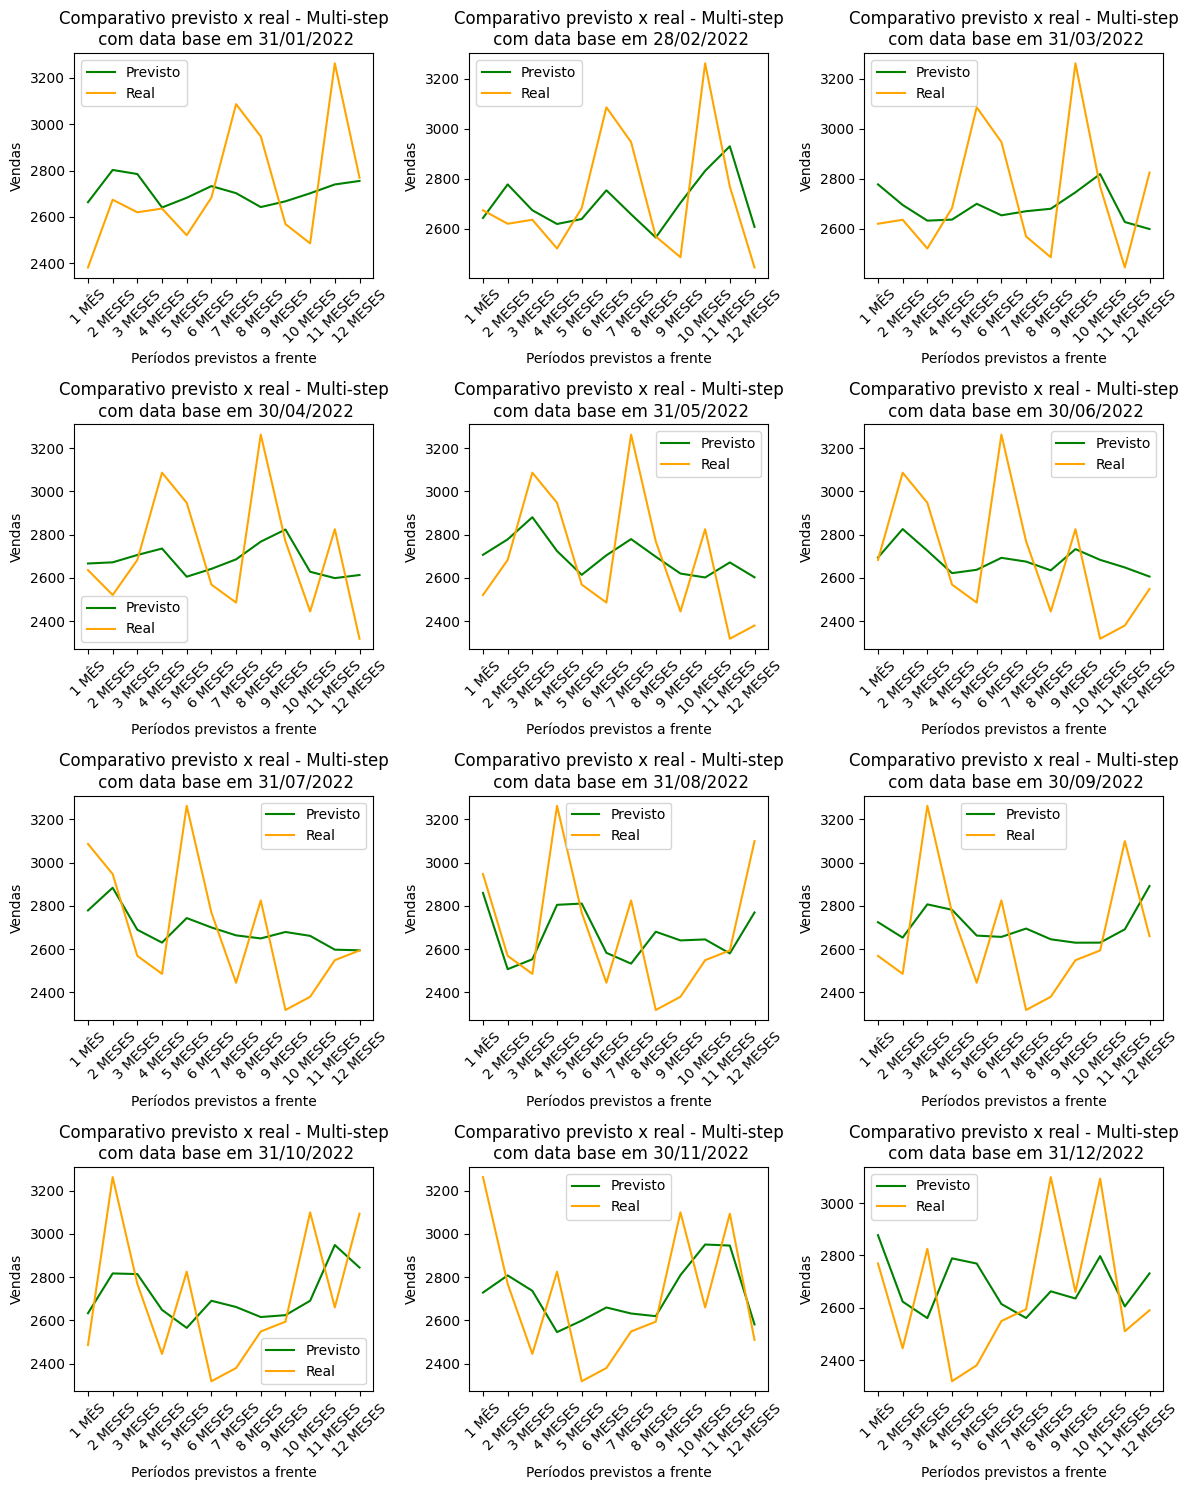

In [332]:
fig, axs = plt.subplots(4, 3, figsize=(12, 15))  
indice_max = 11

for i in range(indice_max + 1):  
    
    row = i // 3  
    col = i % 3   

    axs[row, col].plot(df_pred_T.iloc[:, i], color='green', label='Previsto')
    axs[row, col].plot(y_test_T.iloc[:, i], color='orange', label='Real')
    axs[row, col].set_title(f"Comparativo previsto x real - Multi-step\n com data base em {y_test_T.columns.tolist()[i].strftime('%d/%m/%Y')}")
    axs[row, col].set_xticks(range(len(df_pred_T)))  
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].set_ylabel('Vendas')
    axs[row, col].set_xlabel('Períodos previstos a frente')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Previsão do ano de 2024

In [333]:
data_2024 = pd.DataFrame(df_pred_2024.iloc[-1, :]).T

keep = selected

data_2024 = data_2024[keep]

In [334]:
data_2024

LAG_2    D1    D3     D4   LAG_1  VENDAS     D2   LAG_3  \
2023-12-31  3093.0  80.0 -70.0 -509.0  2510.0  2590.0 -503.0  2660.0   

            PARAMETRO 8  PARAMETRO 5  
2023-12-31      13449.0   57485050.0

In [335]:
pred_2024 = rf_multioutput.predict(data_2024)

In [336]:
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
anos = [2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024]

In [337]:
df_2024 = pd.DataFrame({'Ano':anos, 'Mês':meses, 'Previsões':pred_2024.flatten()})

df_2024['Data'] = pd.to_datetime(df_2024['Ano'].astype(str) + '-' + df_2024['Mês'].astype(str) + '-01') + pd.offsets.MonthEnd(0)

df_2024.set_index('Data', inplace = True)

df_2024.drop(['Ano', 'Mês'], axis = 1, inplace = True)

df_2024

Previsões
Data                   
2024-01-31  2702.729373
2024-02-29  2806.653465
2024-03-31  2699.787129
2024-04-30  2617.450495
2024-05-31  2659.308581
2024-06-30  2663.455446
2024-07-31  2632.432343
2024-08-31  2629.533003
2024-09-30  2790.938944
2024-10-31  2722.980198
2024-11-30  2862.825083
2024-12-31  2593.382838

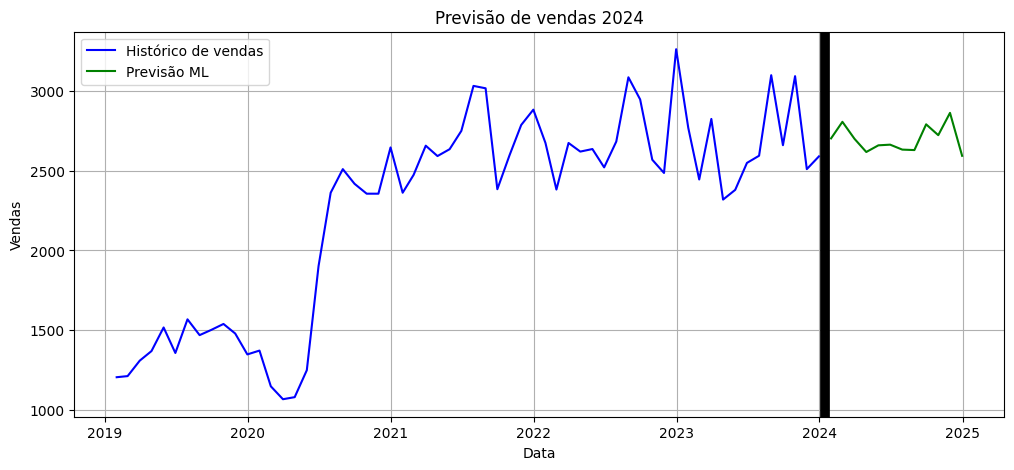

In [338]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = df.index, y = 'VENDAS', color = 'blue', label = 'Histórico de vendas')
sns.lineplot(data = df_2024, x = df_2024.index, y = 'Previsões', color = 'green', label = 'Previsão ML')
plt.title('Previsão de vendas 2024')
v_line_date = pd.Timestamp('2024-01-15')
plt.axvline(x = v_line_date, linestyle = '-', color = 'black', linewidth = 7)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show();